In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from pairinteraction import pireal as pi
import scipy
import csv

In [2]:
# for accessing pair interaction functions

if not os.path.exists("./cache"):
    os.makedirs("./cache")
cache = pi.MatrixElementCache("./cache")

iota=complex(0,1)

In [7]:
array_efield = np.linspace(0, 4, 1000)# V/cm #the range of electric fields

l_lim=8
number_of_l_considered=l_lim+1


for N in range(41,42,1):
        # Initialize a system comprising one rubidium Rydberg atom
        system = pi.SystemOne("Rb", cache)
        N_upper=N+4
        N_lower=N-4
        number_of_n_considered=N_upper - N_lower + 1
        system.restrictN(N_lower, N_upper)
        system.restrictL(0,l_lim)
        state_n_lower=pi.StateOne("Rb",N-2,0,0.5,-0.5)
        state_n_higher=pi.StateOne("Rb",N+2,0,0.5,0.5)
        E_lower_lim=state_n_lower.getEnergy()
        E_upper_lim= state_n_higher.getEnergy()
        system.restrictEnergy(E_lower_lim, E_upper_lim)
        # Consider only states with similar energy and quantum numbers as the defined state
        
        system.setBfield([ 0,0,160])
        labels=[]
        #Diagonalize system, pruning values smaller than 1e-3 from eigenvectors
        print(N)
        #print(number_of_n_considered*(2*(number_of_l_considered)**2))
        Hamiltonian_matrix_dim = np.shape(system.getHamiltonian())[0]
        dim=Hamiltonian_matrix_dim
        for l_ in np.arange(start=0,stop=5,step=1):
            for j_ in np.arange(abs(l_-0.5),l_+0.5+0.001,1):
                for mj_ in np.arange(-j_,j_+1,1):
                    state = pi.StateOne("Rb", int(N), int(l_), float(j_),float( mj_))
                    if (state.getEnergy()< E_upper_lim and state.getEnergy()>E_lower_lim):
                    #state_indices.append(np.argmax(system.getOverlap(state)))
                            labels.append((l_,j_,mj_))
        with open("labels_N_is%d.csv" % N, 'w', newline='') as csvfile:
                csvwriter = csv.writer(csvfile, delimiter=',')
                csvwriter.writerow([dim])
                for index_temp in range(0,len(labels)):
                    csvwriter.writerow(labels[index_temp])
        csvfile.close() 
        e_field_z=0
        #array_overlaps = []
        array_eigenvalues_1=np.zeros(shape=(len(array_efield),dim))
        state_indices=[]
        overlaps=[]
        for efield_index in range(0,len(array_efield)):
            system.setEfield([ array_efield[efield_index],0,e_field_z])
            system.setBfield([ 0,0,160])
            print(np.round(efield_index*100/len(array_efield),2),"percent done",end='\r') 
            # Diagonalize system, pruning values smaller than 1e-3 from eigenvectors
            system.diagonalize()
            # Store the eigenenergies
            #print(system.getHamiltonian())
            temp=(system.getHamiltonian().diagonal())
            #print(np.shape(temp))
            array_eigenvalues_1[efield_index] = np.ravel(temp)
            #overlaps_temp=[]
            state_indices_temp=[]
            for l_ in np.arange(start=0,stop=5,step=1):
                for j_ in np.arange(abs(l_-0.5),l_+0.5+0.001,1):
                    for mj_ in np.arange(-j_,j_+1,1):
                        #print(l_,j_,mj_)
                        state = pi.StateOne("Rb", int(N), int(l_), float(j_),float( mj_)) 
                        if (state.getEnergy()< E_upper_lim and state.getEnergy()>E_lower_lim):     
                            state_indices_temp.append(np.argmax(abs(system.getOverlap(state))))
            state_indices.append(state_indices_temp)
        with open("aray_eigenvalues_N_is%d.csv" % N, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')
            for index_temp in range(0,len(array_eigenvalues_1)):
                csvwriter.writerow(array_eigenvalues_1[index_temp])
        csvfile.close() 
        with open('state_indices_N_is%d.csv'%N, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=',')
            for index_temp in range(0,len(state_indices)):
                csvwriter.writerow(state_indices[index_temp])
        csvfile.close()
                    
                            
    

41


# 1. Generating the Stark Map

We iterate over the range of $E$ electric fields specidied by the array $\textit{array_efield}$ (in $x$ direction)

We operate at $B$ Magnetic field of 160 Gauss, in the $z$ direction

We work with 48 Rb states. For calculations, we consider only those states whose energies lie with $|46s -0.5\rangle $ and$| 50s +0.5\rangle$ levels. Even within this range, principal quantum numbers between $\textit{N_upper}$ and $\textit{N_lower}$ and with angular momentum levels (as defined at zero electric fields) only upto $\textit{l_lim}$ are considered.  

At each electric field,we identify the eigenstates with the maximum overlap with 


# Identifying the indices of the states of interest


In [151]:
array_efield = np.linspace(0, 4, 1000)# V/cm #the range of electric fields
  
# Initialize a system comprising one rubidium Rydberg atom
system = pi.SystemOne("Rb", cache)

# Consider only states with similar energy and quantum numbers as the defined state

N=61
N_upper=N+4
N_lower=N-4
number_of_n_considered=N_upper - N_lower + 1
system.restrictN(N_lower, N_upper)

l_lim=8
number_of_l_considered=l_lim+1
system.restrictL(0,l_lim)

state_n_lower=pi.StateOne("Rb",N-2,0,0.5,-0.5)
state_n_higher=pi.StateOne("Rb",N+2,0,0.5,0.5)

E_lower_lim=state_n_lower.getEnergy()
E_upper_lim= state_n_higher.getEnergy()
#print(E_upper_lim)
#print()
system.restrictEnergy(E_lower_lim, E_upper_lim)


# Consider only states with similar energy and quantum numbers as the defined state
system.setBfield([ 0,0,160])

labels=[]
#Diagonalize system, pruning values smaller than 1e-3 from eigenvectors
print(np.shape(system.getHamiltonian()))
#print(number_of_n_considered*(2*(number_of_l_considered)**2))
Hamiltonian_matrix_dim = np.shape(system.getHamiltonian())[0]
dim=Hamiltonian_matrix_dim
for l_ in np.arange(start=0,stop=5,step=1):
      for j_ in np.arange(abs(l_-0.5),l_+0.5+0.001,1):
            for mj_ in np.arange(-j_,j_+1,1):
                #print(l_,j_,mj_)

                state = pi.StateOne("Rb", int(N), int(l_), float(j_),float( mj_))
                if (state.getEnergy()< E_upper_lim and state.getEnergy()>E_lower_lim):
                    #state_indices.append(np.argmax(system.getOverlap(state)))
                    labels.append((l_,j_,mj_))

                    # the ordering of labels is used later to identify the states

                    # All states that lie in the energy range that is restricted

# Diagonalize the Hamiltonian of the system for different E-fields
print("Dimension of Hamiltonian :", Hamiltonian_matrix_dim)



(502, 502)
Dimension of Hamiltonian : 502


# Generate Stark Map Data
Find the eigenvalues over a range of eletric fields

In [152]:
e_field_z=0
#array_overlaps = []
array_eigenvalues_1=np.zeros(shape=(len(array_efield),dim))
state_indices=[]
overlaps=[]
for efield_index in range(0,len(array_efield)):
    system.setEfield([ array_efield[efield_index],0,e_field_z])
    system.setBfield([ 0,0,160])
    print(np.round(efield_index*100/len(array_efield),2),"percent done",end='\r')
    # Diagonalize system, pruning values smaller than 1e-3 from eigenvectors
    system.diagonalize()
    
    # Store the eigenenergies
    #print(system.getHamiltonian())
    temp=(system.getHamiltonian().diagonal())
    #print(np.shape(temp))
    array_eigenvalues_1[efield_index] = np.ravel(temp)
    #overlaps_temp=[]
    state_indices_temp=[]
    for l_ in np.arange(start=0,stop=5,step=1):
        for j_ in np.arange(abs(l_-0.5),l_+0.5+0.001,1):
            for mj_ in np.arange(-j_,j_+1,1):
                #print(l_,j_,mj_)
                state = pi.StateOne("Rb", int(N), int(l_), float(j_),float( mj_))
                if (state.getEnergy()< E_upper_lim and state.getEnergy()>E_lower_lim):    
                        state_indices_temp.append(np.argmax(abs(system.getOverlap(state))))
                    
    state_indices.append(state_indices_temp)
   

    


In [ ]:
# store the eigenvalues at all E fields
import csv
with open('array_eigenvalues_1.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    for index_temp in range(0,len(array_eigenvalues_1)):
        csvwriter.writerow(array_eigenvalues_1[index_temp])
csvfile.close()


In [26]:
# store the generated satte_indices 

import csv
with open('state_indices.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    for index_temp in range(0,len(state_indices)):
        csvwriter.writerow(state_indices[index_temp])
csvfile.close()

In [3]:
# read the stored state_indices

state_indices=[]

with open("state_indices.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        state_indices.append(row)
for convindex in range(len(state_indices)):
    for index2 in range(len(state_indices[convindex])):
        state_indices[convindex][index2]=int(state_indices[convindex][index2])

In [4]:
# read the stored energy eigenvalues

array_eigenvalues_1=[]

with open("array_eigenvalues_1.csv", 'r') as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        array_eigenvalues_1.append(row)
for convindex in range(len(array_eigenvalues_1)):
    for index2 in range(len(array_eigenvalues_1[convindex])):
        array_eigenvalues_1[convindex][index2]=float(array_eigenvalues_1[convindex][index2])
array_eigenvalues_1=np.array(array_eigenvalues_1)

# Plot the states 

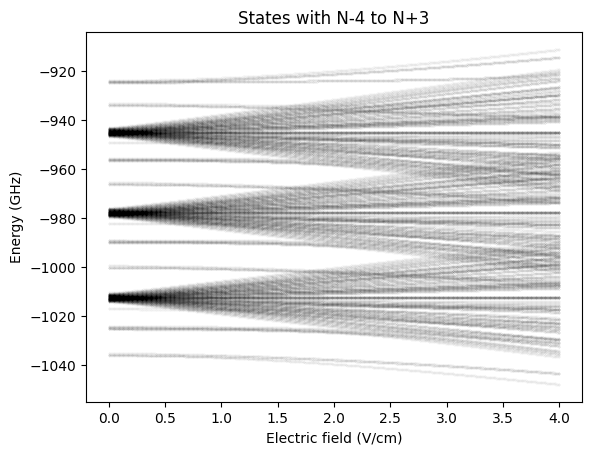

In [153]:
# Plot Stark map, the color code visualizes overlap of eigenstates with defined state
#colors_used = matplotlib.cm.get_cmap('viridis', 2*(number_of_l_considered)**2)

for j in range(0,Hamiltonian_matrix_dim):
    plt.scatter(array_efield,array_eigenvalues_1[:,j],0.0001,label=j,color='k')
plt.xlabel("Electric field (V/cm)")
plt.ylabel("Energy (GHz)")
plt.title("States with N-4 to N+3")
#plt.legend()
#plt.xlim(2.5,4)
#plt.xlim(2.95,3.0)
plt.show()

# Plot the states that correspond to maximum overlap with unperturbed states

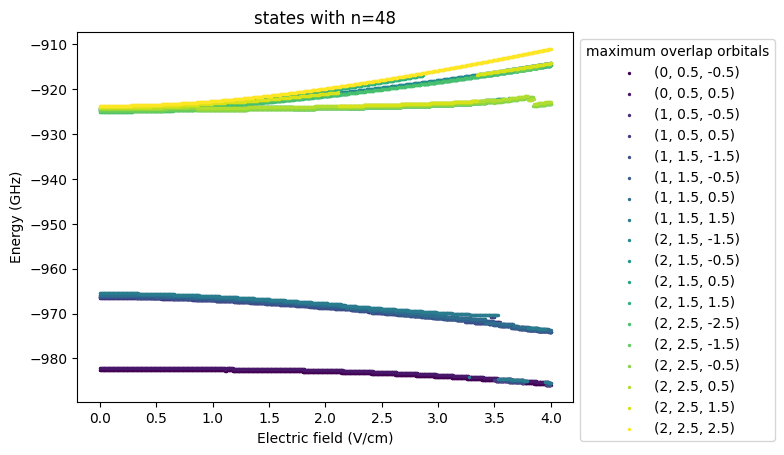

In [154]:
eigenstates_of_N=np.zeros(shape=(len(state_indices[0]),len(array_efield)))
#eigenstates_of_N =np.zeros(shape=((2*(number_of_l_considered)**2),len(array_efield)))
for k in range(0,len(labels)):
    for e in range(0,len(array_efield)):
        #for k in range(0,2*(number_of_l_considered)**2)
        #diff_from_max_overlap=

        #np.abs(array_eigenvalues_1[e][state_indices[e][k]]-array_eigenvalues_1[0][state_indices[e][k]]),abs(np.argmin(np.abs(array_eigenvalues_1[e]-array_eigenvalues_1[0][state_indices[e][k]]))))
        #print(state_indices[e][k])
        #print(array_eigenvalues_1[e][state_indices[e][k]])
        if (state_indices[e][k]==None):
            eigenstates_of_N[k][e]=None
        else:
            eigenstates_of_N[k][e]= array_eigenvalues_1[e][state_indices[e][k]] 
             #np.argmin(# [np.argmin(np.abs(array_eigenvalues_1[e]-array_eigenvalues_1[0][state_indices[k]]))]
#print("done")
colors_used = plt.get_cmap('viridis', len(eigenstates_of_N))

for index in range(0,len(eigenstates_of_N)):
    plt.scatter(array_efield,eigenstates_of_N[index], 2,label=labels[index],color=colors_used((index%len(eigenstates_of_N))))
plt.xlabel("Electric field (V/cm)")
plt.ylabel("Energy (GHz)")
plt.legend(title="maximum overlap orbitals",bbox_to_anchor=(1,1))
plt.title("states with n=48")
#plt.ylim(-1615,-1595)
#plt.xlim(5.5,6)
plt.show()

#if crossing of levels is obsevred, then the labeling must be considered

# Plot of maximal overlap states with the actual states

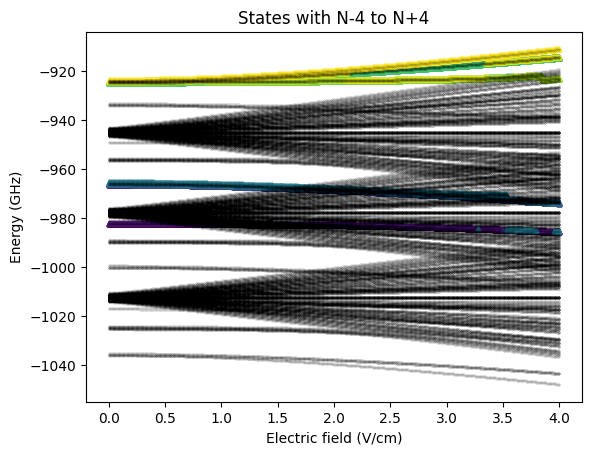

In [155]:
for index in range(0,len(eigenstates_of_N)):
    plt.scatter(array_efield,eigenstates_of_N[index], 10,label=labels[index],color=colors_used((index%len(eigenstates_of_N))),marker='^')
for j in range(0,Hamiltonian_matrix_dim):
    plt.scatter(array_efield,array_eigenvalues_1[:,j],0.001,label=j,color='k')
plt.xlabel("Electric field (V/cm)")
plt.ylabel("Energy (GHz)")
plt.title("States with N-4 to N+4")
#plt.legend()
#plt.xlim(2.5,4)
#plt.xlim(4.95,6.0)
#plt.ylim(-1603.5,-1601.5)
plt.show()

In [156]:
def differentiation(x_data,y_data):
    derivative=np.zeros(shape=(len(y_data),))
    if( len(x_data)!=len(y_data)):
        print("error, x and y dim different")
        return None
    derivative[0] = (y_data[1]-y_data[0])/(x_data[1]-x_data[0])
    derivative[-1] = (y_data[-1]-y_data[-2])/(x_data[-1]-x_data[-2])
    for index in range(1,len(x_data)-1):
        grad_1_temp=(y_data[index+1] -y_data[index])/(x_data[index+1]-x_data[index])
        grad_2_temp=(y_data[index] -y_data[index-1])/(x_data[index]-x_data[index-1])

        if (abs(abs(grad_1_temp)-(abs(grad_2_temp)))>10**-1):
            derivative[index]=None
        else:
            derivative[index]= (y_data[index+1] -y_data[index])/(x_data[index+1]-x_data[index])
    return derivative

In [157]:
# Used differentiation twice instead
def second_derivative(x_data,y_data):
    out=np.zeros(shape=(len(y_data),))
    if( len(x_data)!=len(y_data)):
        print("error, x and y dim different")
        return None
    
    out[0] =(y_data[2]-2*y_data[1]+y_data[0])/(x_data[1]-x_data[0])**2
    out[-1] = (y_data[-1]-2*y_data[-2]+y_data[-3])/(x_data[-1]-x_data[-2])**2
    for index in range(1,len(x_data)-1):
        out[index]= (y_data[index+1]-2*y_data[index] +y_data[index-1])/(x_data[index+1]-x_data[index])**2
    return out

In [158]:
# change this to give only linear segment
def length_of_linear_regime(line,y_data,x_data,center_point_index):
    if((len(line)!=len(y_data)) or ((len(line)!=len(x_data)))or (len(x_data)!=len(y_data))):
        print("error in length of linear_regime(); dim of x_data,y_data,and line should be same")
        return
    deviation=abs(line-y_data)
    temp_max=[]
    max_index= center_point_index
    while (max_index < len(x_data)-1):
        if(deviation[max_index]>10**-4):
            break
        max_index+=1

    min_index=center_point_index
    while (min_index >0 ):
        if(deviation[min_index]>10**-4):
            break
        min_index-=1

    #returns linear regime length
    return abs(x_data[max_index] - x_data[min_index])


In [159]:
def find_linear_regime(line, y_data,x_data,center_point_index):
    if((len(line)!=len(y_data)) or ((len(line)!=len(x_data)))or (len(x_data)!=len(y_data))):
        print("error in length of linear_regime(); dim of x_data,y_data,and line should be same")
        return
    deviation=abs(line-y_data)
    temp_max=[]
    max_index= center_point_index
    while (max_index < len(x_data)-1):
        if(deviation[max_index]>10**-4):
            break
        max_index+=1

    min_index=center_point_index
    while (min_index >0 ):
        if(deviation[min_index]>10**-4):
            break
        min_index-=1


    #returns linear regime length
    return abs(x_data[max_index] - x_data[min_index]),x_data[max_index],x_data[min_index]

In [160]:
def is_close_to_singularity(y_data,x_coord_index,y_discontinuity=0.05):
    flag=0
    # assuming same x and y data lengths
    for j in range(max(1,x_coord_index-30),min(x_coord_index+30,len(y_data)-2)):
       # print(j)
        if (y_data[j]-y_data[j+1]>y_discontinuity):
            flag=1
            return flag
    return flag

In [161]:
labels_at_zero_E_field=[]
for l_ in np.arange(start=0,stop=5,step=1):
      for j_ in np.arange(abs(l_-0.5),l_+0.5+0.001,1):
            for mj_ in np.arange(-j_,j_+1,1):
                #print(l_,j_,mj_)

                state = pi.StateOne("Rb", int(N), int(l_), float(j_),float( mj_))
                if (state.getEnergy()< E_upper_lim and state.getEnergy()>E_lower_lim):
                    #state_indices.append(np.argmax(system.getOverlap(state)))
                    labels_at_zero_E_field.append((l_,j_,mj_))

                    # the ordering of labels is used later to identify the states

                    # All states that lie in the energy range that is restricted
system.setEfield([0,0,0])
system.setBfield([ 0,0,0])
# Diagonalize system, pruning values smaller than 1e-3 from eigenvectors
system.diagonalize()

# Store the eigenenergies
    #print(system.getHamiltonian())
temp=(system.getHamiltonian().diagonal())
    #print(np.shape(temp))
pure_eigenvalues = np.ravel(temp)
pure_state_indices=[]
labels_of_all_original_states=[]
for N_index in range(N-4,N+4):
    for l_ in np.arange(start=0,stop=9,step=1):
        for j_ in np.arange(abs(l_-0.5),l_+0.5+0.001,1):
            for mj_ in np.arange(-j_,j_+1,1):
                #print(l_,j_,mj_)
                state = pi.StateOne("Rb", int(N_index), int(l_), float(j_),float( mj_))
                if (state.getEnergy()< E_upper_lim and state.getEnergy()>E_lower_lim):
                    # check if the maximum overlapis more than 50percent, if not then the eigenstate is distributed over differenet states
                    #if max(system.getOverlap(state)>=0.4):
                        pure_state_indices.append(np.argmax(system.getOverlap(state)))
                        labels_of_all_original_states.append((N_index,l_,j_,mj_))
                    #else:
                     #   state_indices_temp.append(None)
            #        labels.append((l_,j_,mj_))
for x in range(0,502):
    if(pure_state_indices[x]!=x):
        x
# thus the ordering of teh pure eigenvectors is the same as expected  


In [162]:
dipole_values=np.zeros(shape=(dim,dim))
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        dipole_values[indexfinal][indexinit]=cache.getElectricDipole(statefinal, stateinit)
     
    
    

In [163]:
dipole_values_minus=np.zeros(shape=(dim,dim))
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        if(labels_of_all_original_states[indexfinal][3]-labels_of_all_original_states[indexinit ][3]==-1):\
            dipole_values_minus[indexfinal][indexinit]=cache.getElectricDipole(statefinal, stateinit)
     
    

In [164]:
dipole_values_plus=np.zeros(shape=(dim,dim))
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        if(labels_of_all_original_states[indexfinal][3]-labels_of_all_original_states[indexinit ][3]==1):\
            dipole_values_plus[indexfinal][indexinit]=cache.getElectricDipole(statefinal, stateinit)
     

In [165]:
dipole_values_0=np.zeros(shape=(dim,dim))
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        if(labels_of_all_original_states[indexfinal][3]-labels_of_all_original_states[indexinit ][3]==0):\
            dipole_values_0[indexfinal][indexinit]=cache.getElectricDipole(statefinal, stateinit)

In [166]:
flag=0
# check if all the dipole_values are zero
for i1 in range(dim):
    for i2 in range(dim):
        if (dipole_values[i1][i2]!=0):
            print("not all zero")
            flag=1
            break
    if (flag==1):
        break
flag=0
# check if all the dipole_values are zero
for i1 in range(dim):
    for i2 in range(dim):
        if (dipole_values_0[i1][i2]!=0):
            print("not all zero")
            flag=1
            break
    if (flag==1):
        break

not all zero
not all zero


In [142]:
def dipole_matrix_element(state_final_bra,state_init_ket):
    temp=np.matmul(np.conjugate(np.transpose(state_final_bra)),dipole_values)
 #   print("A.B=",temp)
    temp2=np.matmul(temp,state_init_ket)
#    print("C.D",temp2)
    return temp2

# The electric dipole moment reference

The electric dipole moments reported as percentages of the electric dipole matrix element $\langle 48 \space S\space 0.5\space 0.5 \space| e \space\hat d | \space48\space P \space1.5\space 0.5 \space\rangle$

In [167]:
# the reference dipole moment in units of GHz(V/cm)^−1

state_48S_half_half=pi.StateOne("Rb",N,0,0.5,0.5)
state_48P_three_half_half=pi.StateOne("Rb",N,1,1.5,0.5)

reference_electric_dipole_moment=cache.getElectricDipole(state_48P_three_half_half,state_48S_half_half)
print(reference_electric_dipole_moment)
#print(state_48S_half_half)
#dipole_matrix_element()

-2.3004174376397315


In [144]:
# in case the refernece  needs to be different uncomment the following

#state_48S_half_half=pi.StateOne("Rb",48,0,0.5,0.5)
#state_48P_three_half_half=pi.StateOne("Rb",48,1,1.5,1.5)

#temp=cache.getElectricDipole(state_48P_three_half_half,state_48S_half_half)
#print(temp)
#print(state_48S_half_half)
#dipole_matrix_element()

In [168]:

interatomic_dist=6 # in micrometer
efield_gradient=6*10**-4

# Finding the Linear Regime

The code below finds the best point where the second derivative of the energy difference vs electric field is zero.
It takes in as input the ground state, considers transitions to levels to which the maximum contribution comes form a state with allowed dipole transitions 

In [146]:
def linear_regime_for_allowed_transitions(transition_from_L,transition_from_J,transition_from_mj , plot_derivatives=False,preference='max_slope',preferred_zero=0):
    
    state_temp_grnd=pi.StateOne("Rb",int(N),int(transition_from_L),float(transition_from_J),float(transition_from_mj))
    out_allowed_transitions=[]
    # the input state is the ground state
    eng_diff_from_this_level=np.zeros(shape=(len(eigenstates_of_N),len(array_efield)))
    for index in range(0,len(eng_diff_from_this_level)):
        eng_diff_from_this_level[index] =np.subtract( eigenstates_of_N[index] ,eigenstates_of_N[labels.index((transition_from_L,transition_from_J,transition_from_mj ))])
        for temp_index in range(0,len(eng_diff_from_this_level[index])):
            if(is_close_to_singularity(eng_diff_from_this_level[index],temp_index,0.5)):
                eng_diff_from_this_level[index][temp_index]=None

    for index in range(labels.index((transition_from_L,transition_from_J,transition_from_mj)),len( eigenstates_of_N)):
        if (((labels[index][0] - transition_from_L)==1 or (labels[index][0] - transition_from_L)== -1) and ((labels[index][2]-transition_from_mj)<=1 and (labels[index][2]-transition_from_mj)>=-1)):
            #diff_dash=differentiation(array_efield, eng_diff_from_this_level[index])
            #diff_dash2=differentiation(array_efield,diff_dash)

            diff_dash=differentiation(array_efield,eng_diff_from_this_level[index])
            diff_dash2=differentiation(array_efield,diff_dash)
            #ideal_points = np.argwhere(abs(diff_dash2[:-2])<10**-2)
            #if (len(ideal_points)==0):

            #plt.plot(array_efield,diff_dash)
            #plt.show()

            #plt.plot(array_efield,diff_dash2)
            #plt.show()

            ideal_points=[]
           # print(diff_dash2)
            for j in range(1,len(diff_dash2)-2):
                if (abs(diff_dash2[j])<10**-2 or diff_dash2[j-1]*diff_dash2[j+1]<0 ):
                    #print('j=',j)
                    if(not is_close_to_singularity(eng_diff_from_this_level[index],j,0.05)):

                        ideal_points.append(j)


            #print(ideal_points)
            ideal_points=np.array(ideal_points)

            if(len(ideal_points)==0):
                 # if there exist point swhere the second derivative is not zero, then
                print(f"No ideal points for {labels[index]}")
                plt.plot(array_efield, eng_diff_from_this_level[index],label='actual data')
                if(plot_derivatives==True):
                    #plot the derivative of the stark line
                    plt.plot(array_efield,diff_dash,label='first derivative')
                    plt.title("first derivative of Energy difference vs Electric field")
                    plt.ylabel("first derivative (in GHz /(V/cm))")
                    #plt.axhline(y=diff_dash[first_ideal_pt],linestyle="--",label="slope of fitted line",color="orange")
                    #plt.axvline(x=array_efield[first_ideal_pt],linestyle="--",label="ideal electric field",color='pink')
                    plt.legend()
                    plt.show()

                #plot the second derivative of the stark line
                    plt.plot(array_efield,diff_dash2)
                    plt.title("Second derivative of Energy difference vs Electric field")
                    plt.ylabel("second derivative (in GHz /(V/cm))")
                    #plt.axhline(y=0,linestyle="--",label=" y=0 ",color='orange')
                    #plt.axvline(x=array_efield[first_ideal_pt],linestyle="--",label="ideal electric field",color='pink')
                    plt.legend()
                    plt.show()




                continue
            else:  # if there exist point swhere the second derivative is zero, then

                match preference:
                    case 'preferred_zero' :
                        if(preferred_zero>len(ideal_points)):
                            print(f"Number of ideal points less than {preferred_zero+1},\n considering 1st ideal point")
                            first_ideal_pt = ideal_points[0]
                        else: 
                            first_ideal_pt = ideal_points[preferred_zero-1]
                            
                    case 'max_linear_region':
                        temp_lengths_of_linear_regimes=[]
                        for point_index in ideal_points:
                            temp_line=(array_efield-array_efield[point_index])*diff_dash[point_index] +  eng_diff_from_this_level[index][point_index]
                            temp_lengths_of_linear_regimes.append(length_of_linear_regime(temp_line, eng_diff_from_this_level[index],array_efield,point_index))
                            #print(temp_lengths_of_linear_regimes
                            first_ideal_pt=ideal_points[np.argmax( temp_lengths_of_linear_regimes)]
                    case 'max_slope':
                        first_ideal_pt=ideal_points[np.argmax(abs(diff_dash[ideal_points]))]
                        #print(np.abs(diff_dash[ideal_points]))
                        #print(array_efield[first_ideal_pt])
                    
                        
                    case other:
                         print("select a preference for the ideal points ")


                approximate_line=(array_efield-array_efield[first_ideal_pt])*diff_dash[first_ideal_pt] +  eng_diff_from_this_level[index][first_ideal_pt]

                #print(first_ideal_pt) # fartehst away from H manifold
                linear_region,x_max,x_min=find_linear_regime(approximate_line, eng_diff_from_this_level[index],array_efield,first_ideal_pt)

                #plot the linear fit
                Energy_diff_at_optimal_point= eng_diff_from_this_level[index][first_ideal_pt] #### here
                
                ######################## finding dipole matrix element #########################
                # Initialize a system comprising one rubidium Rydberg atom
                #print("reached here")
                system = pi.SystemOne("Rb", cache)
                # Consider only states with similar energy and quantum numbers as the defined state
                system.restrictN(N_lower, N_upper)
                system.restrictL(0,l_lim)
                state_n_lower=pi.StateOne("Rb",N-2,0,0.5,-0.5)
                state_n_higher=pi.StateOne("Rb",N+2,0,0.5,0.5)
                #print(E_upper_lim)
                #print()
                system.restrictEnergy(E_lower_lim, E_upper_lim)
                system.setBfield([ 0,0,160])
                system.setEfield([array_efield[first_ideal_pt],0,0])
                system.diagonalize()
                temp=(system.getHamiltonian().diagonal())
                eigenvalues_at_this_E_field=temp
                transition_to_L,transition_to_J,transition_to_mj=labels[index]
                
                state_temp_excited=pi.StateOne("Rb",int(N),int(transition_to_L),float(transition_to_J),float(transition_to_mj))
                
                overlaps_excited_state=system.getOverlap(state_temp_excited)
                
                overlaps_grnd_state=system.getOverlap(state_temp_grnd)
                
                #print(np.argmax(abs(overlaps_excited_state)))
                #print(max(abs(overlaps_excited_state)))
                #print(np.argmax(abs(overlaps_grnd_state)))
                #print(max(abs(overlaps_grnd_state)))
                #eigenvalues_at_this_E_field = np.ravel(temp)
                eigenvectors_at_this_E_field=system.getBasisvectors()
                
                grnd_state_eigenvector_at_this_E_field= eigenvectors_at_this_E_field[:,np.argmax(abs(overlaps_grnd_state))]
                
                excited_state_eigenvector_at_this_E_field=eigenvectors_at_this_E_field[:,np.argmax(abs(overlaps_excited_state))]
                
                grnd_state_eigenvector_at_this_E_field=np.reshape(scipy.sparse.csc_matrix.toarray(grnd_state_eigenvector_at_this_E_field),(dim,))
                #print(grnd_state_eigenvector_at_this_E_field)
                excited_state_eigenvector_at_this_E_field=np.reshape(scipy.sparse.csc_matrix.toarray(excited_state_eigenvector_at_this_E_field),(dim,))
                #print(excited_state_eigenvector_at_this_E_field)
                
                
                
                print("grndstate",labels_of_all_original_states[np.argmax(abs(grnd_state_eigenvector_at_this_E_field))])
                
                print("excitedstate",labels_of_all_original_states[np.argmax(abs(excited_state_eigenvector_at_this_E_field))])
                
                electric_dipole_moment_abs = dipole_matrix_element(grnd_state_eigenvector_at_this_E_field,excited_state_eigenvector_at_this_E_field)                 
                
                electric_dipole_moment_relative =electric_dipole_moment_abs*100 /reference_electric_dipole_moment
                
                
                #print("dipole found")
                ######
            
                
                    
                slope=diff_dash[first_ideal_pt]
                
                spiral_time = 1/(2*slope*efield_gradient*interatomic_dist)
                
                E_field=array_efield[first_ideal_pt]

                plt.plot(array_efield,approximate_line,linestyle=':',label="linear approximation")
                #plot actual data
                plt.plot(array_efield, eng_diff_from_this_level[index],label='actual data')
           # the ideal point
                plt.scatter(array_efield[first_ideal_pt], eng_diff_from_this_level[index][first_ideal_pt], marker=".", color='k',label='ideal point')

            # The max point of linear regime
                plt.scatter(x_max, eng_diff_from_this_level[index][list(array_efield).index(x_max)],marker='+',label="max of linear region",color='g')

            # The min point of linear regime
                plt.scatter(x_min, eng_diff_from_this_level[index][list(array_efield).index(x_min)],marker='^',label='min of linear region',color='b')
                plt.legend(bbox_to_anchor=(1,1))
                plt.title(f"{(transition_from_L,transition_from_J,transition_from_mj)} $\longrightarrow$ {labels[index]}")

            #print the slope of the linear fit
            #plt.text(x_max +1, eng_diff_from_this_level[index][list(array_efield).index(x_max)],f"slope={np.round(diff_dash[first_ideal_pt],4)};\n E field ={np.round(array_efield[first_ideal_pt],4)}, \n linear region = {np.round(linear_region,4)}")
                spiral_time_in_ns=spiral_time
                
                print(np.round(spiral_time_in_ns,2))
                plt.text(0,eng_diff_from_this_level[index][list(array_efield).index(x_max)]-2,\
                     f"slope={np.round(slope,2)};\n E field ={np.round(E_field,2)},\
                     \n linear region = {np.round(linear_region,2)} \n electric dipole moment ={np.round(electric_dipole_moment_relative,2)} $\%$ ,\
                     \nspiral time = {np.round(abs(spiral_time_in_ns),2)} ns")

                plt.ylabel("Energy Difference (in GHz)")
                plt.xlabel("Electric Field (in V/cm)")
        #    plt.axhline(y=0)
         #   plt.axvline(x=array_efield[first_ideal_pt])

        #plt.plot(array_efield,eng_diff_from_S_plus_half[index])
            #plt.title(labels[index])
                plt.show()


                if(plot_derivatives==True):
                    #plot the derivative of the stark line
                    plt.plot(array_efield,diff_dash,label='first derivative')
                    plt.title("first derivative of Energy difference vs Electric field")
                    plt.ylabel("first derivative (in GHz /(V/cm))")
                    plt.axhline(y=diff_dash[first_ideal_pt],linestyle="--",label="slope of fitted line",color="orange")
                    plt.axvline(x=array_efield[first_ideal_pt],linestyle="--",label="ideal electric field",color='pink')
                    plt.legend()
                    plt.show()

                #plot the second derivative of the stark line
                    plt.plot(array_efield,diff_dash2)
                    plt.title("Second derivative of Energy difference vs Electric field")
                    plt.ylabel("second derivative (in GHz /(V/cm))")
                    plt.axhline(y=0,linestyle="--",label=" y=0 ",color='orange')
                    plt.axvline(x=array_efield[first_ideal_pt],linestyle="--",label="ideal electric field",color='pink')
                    plt.legend()
                    plt.show()
            print(eigenvalues_at_this_E_field[state_indices[first_ideal_pt][index]]== eigenstates_of_N[index][first_ideal_pt])
        
            out_allowed_transitions.append((labels[index][0],labels[index][1],labels[index][2],\
                                            diff_dash[first_ideal_pt],\
                                            array_efield[first_ideal_pt],\
                                            linear_region,\
                                            Energy_diff_at_optimal_point,\
                                            eigenstates_of_N[labels.index((transition_from_L,transition_from_J,transition_from_mj ))][first_ideal_pt],\
                                            eigenstates_of_N[index][first_ideal_pt],\
                                            electric_dipole_moment_relative,grnd_state_eigenvector_at_this_E_field,excited_state_eigenvector_at_this_E_field,\
                                            spiral_time_in_ns,array_efield[list(array_efield).index(x_min)],array_efield[list(array_efield).index(x_max)]))


    #returns (L,J,mj, slope of line, electric field, linear region, energy difference,energy_of_ground_state,energy_of_excited_state and electric dipole moment\
#    ground state eigenevector and excited state,list(array_efield).index(x_min),list(array_efield).index(x_max))



# slope = 3


# electric field =4

# linear_region=5

# energy_difference=6

# energy of ground state=7
 
# energy of excited state=8

# electric dipole at ideal point=9

# eigenvector at ideal point for ground state=10

# eigenvector at ideal point for excited state=11

#spiral_time_in_ns = 12

#min electric field of linear region=13

#max electric field of linear region=14
    return out_allowed_transitions


grndstate (61, 0, 0.5, -0.5)
excitedstate (61, 1, 0.5, -0.5)
-134.47


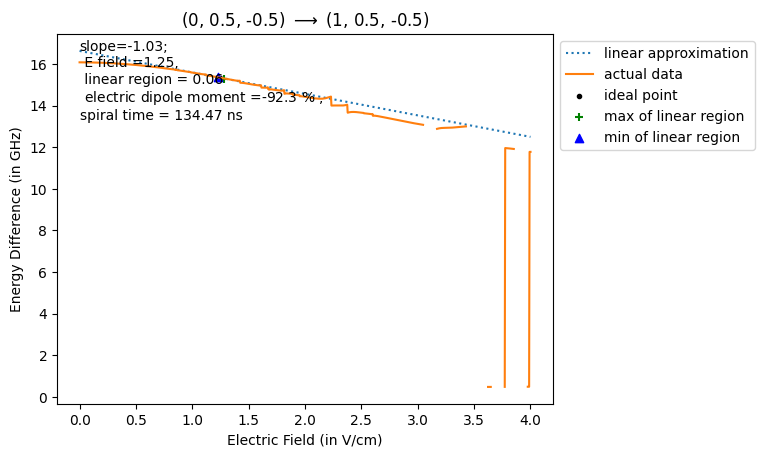

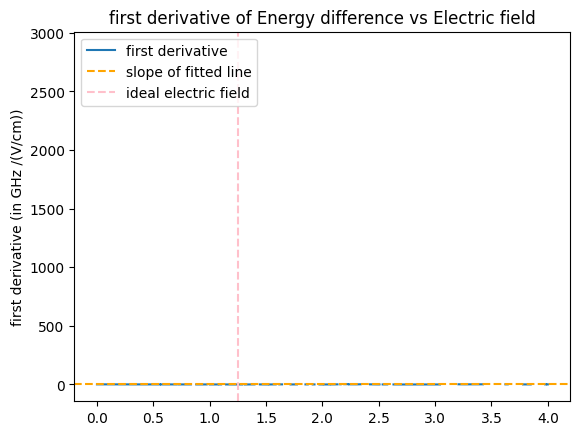

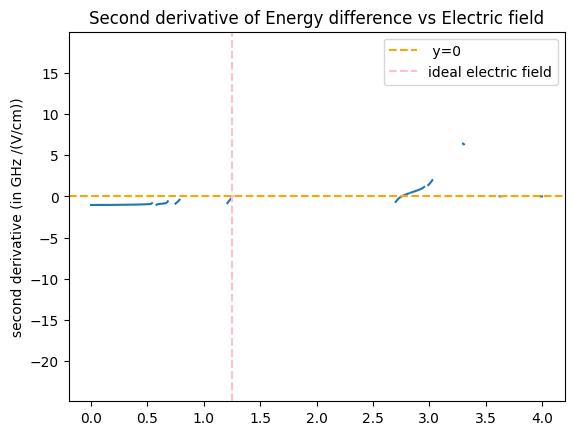

True
grndstate (61, 0, 0.5, -0.5)
excitedstate (61, 1, 0.5, 0.5)
-135.98


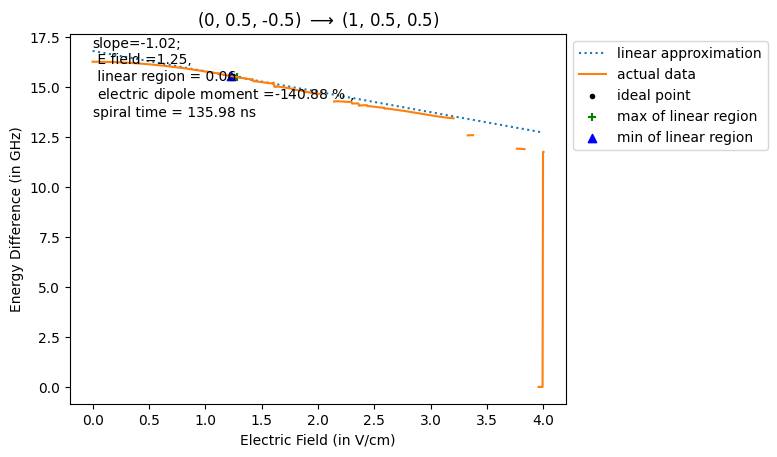

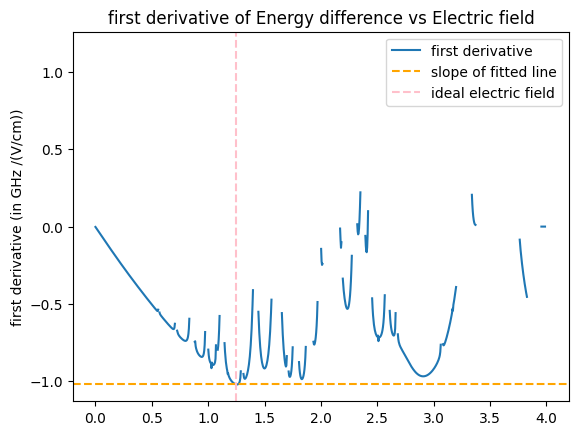

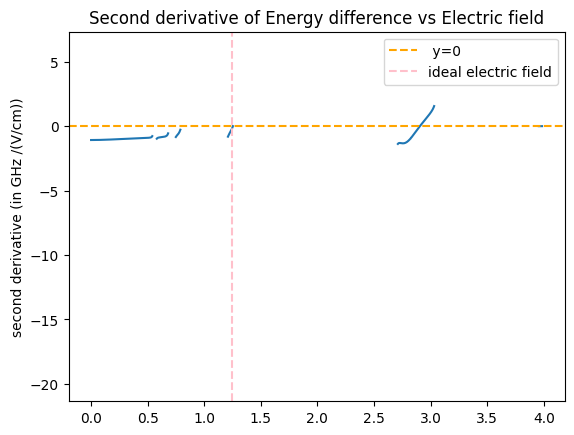

True
grndstate (61, 0, 0.5, -0.5)
excitedstate (61, 1, 1.5, -1.5)
-114.91


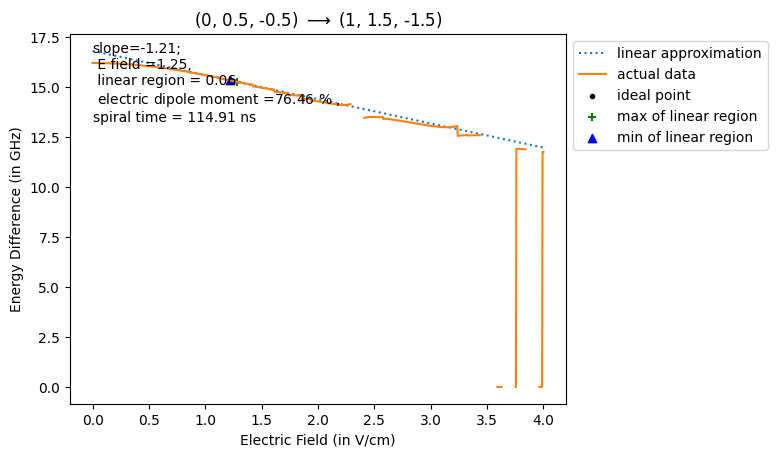

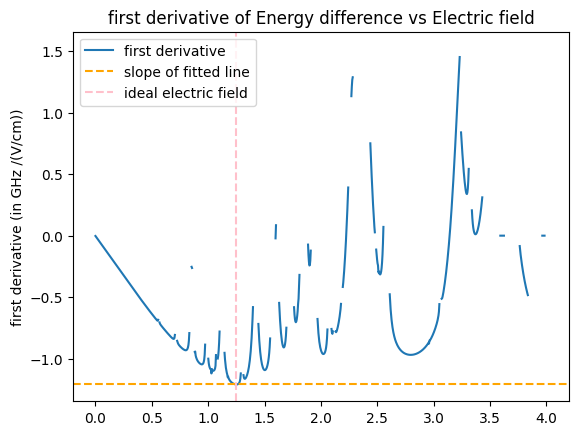

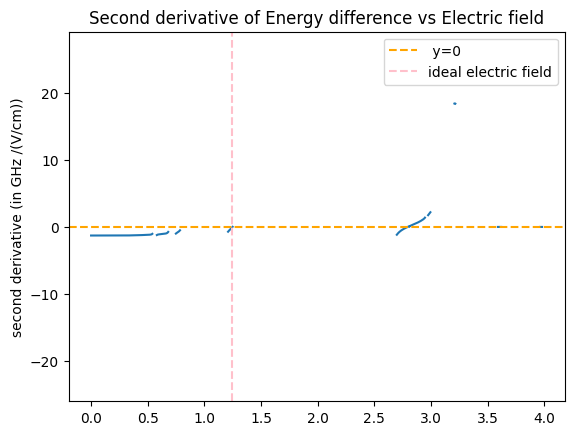

True
grndstate (61, 0, 0.5, -0.5)
excitedstate (61, 1, 1.5, -0.5)
-120.21


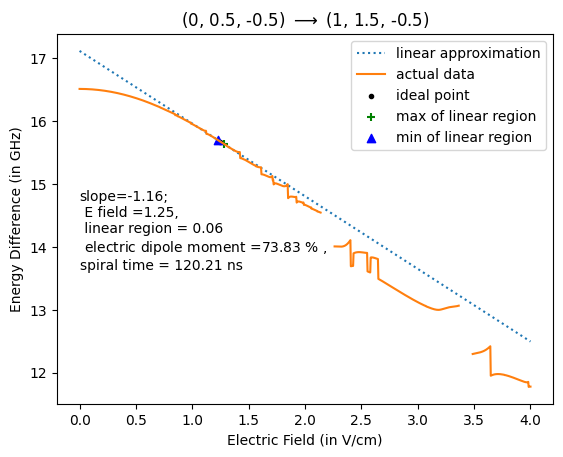

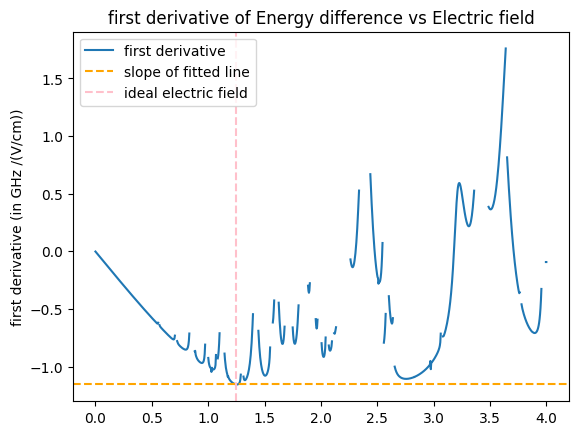

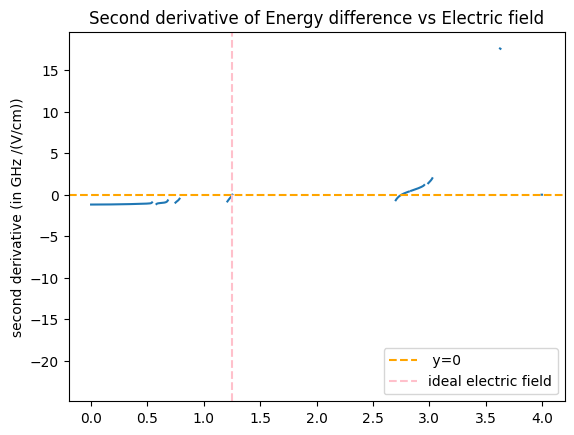

True
grndstate (61, 0, 0.5, -0.5)
excitedstate (61, 1, 1.5, 0.5)
-124.76


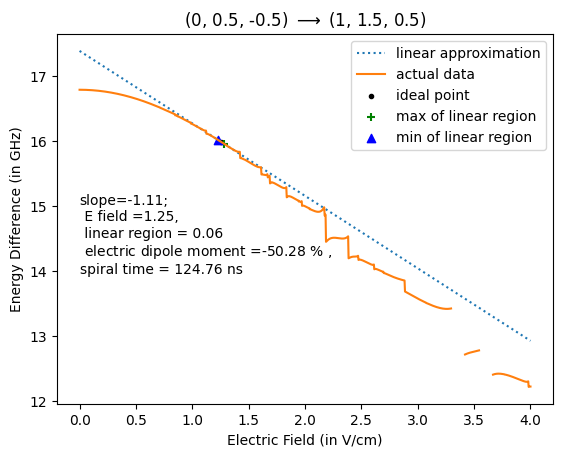

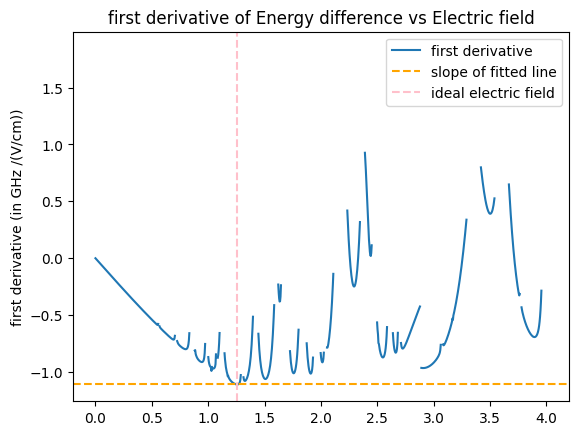

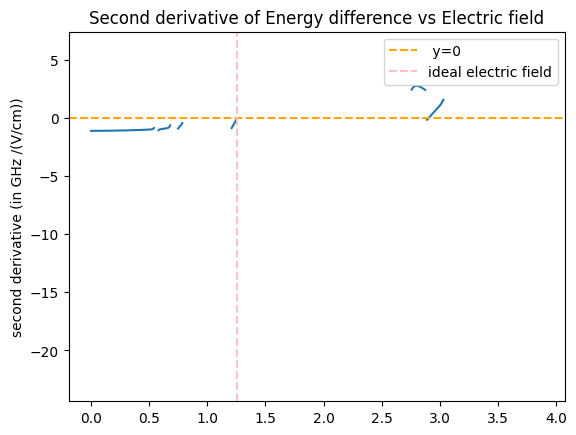

True


In [169]:
a=linear_regime_for_allowed_transitions(0,0.5,-0.5,True,preference='preferred_zero',preferred_zero=1)

# Choose the ideal transistion


The find_linear_regime function above returns:

(L,J,mj (of the excietd level), slope of line at ideal point (in $GHz/(V/cm)$), ideal electric field (in $V/cm$), linear region of the electric field (where deviation from the linearity of the curve is less than $100 KHz$) in ($V/cm$), energy difference between the two levels,energy_of_ground_state,energy_of_excited_state at the ideal electric field (in $GHz$) and electric dipole moment in (percentage of the reference foudn above)), in that order 

(all as single floats, the first three are not tuples)

The code below chooses the property requiried (given by the second index of the output). 


In [205]:
#Choose the level with maximm electric dipole
ground_state=(0,0.5,0.5)
max_index=0
for a_index in range(0,len(a)):
    if(abs(a[a_index][9])> abs(a[max_index][9])):
        print(abs(a[a_index][9]))
        max_index=a_index
        print(a_index)

140.88248711650843
1


In [181]:
#choose a transition manually
max_index=4

Text(0.5, 1.0, '0,0.5,0.5  ')

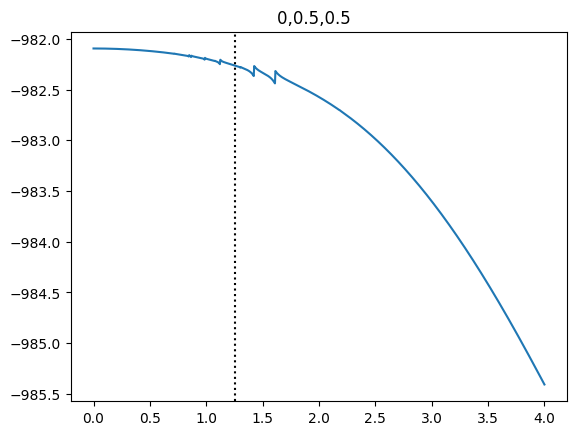

In [182]:
plt.plot(array_efield,eigenstates_of_N[labels.index(ground_state)][:])
plt.axvline(x=a[max_index][4],color='k',linestyle=':')
plt.title("0,0.5,0.5  ")

Text(0.5, 1.0, '(1, 1.5, 0.5)')

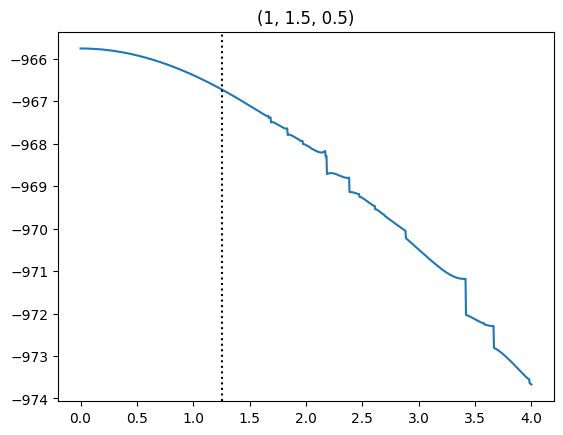

In [183]:
plt.plot(array_efield,eigenstates_of_N[labels.index(a[max_index][0:3])][:])
plt.axvline(x=a[max_index][4],color='k',linestyle=':')
plt.title(a[max_index][0:3])

Text(0.5, 1.0, 'difference in (0, 0.5, 0.5) and (1, 1.5, 0.5)')

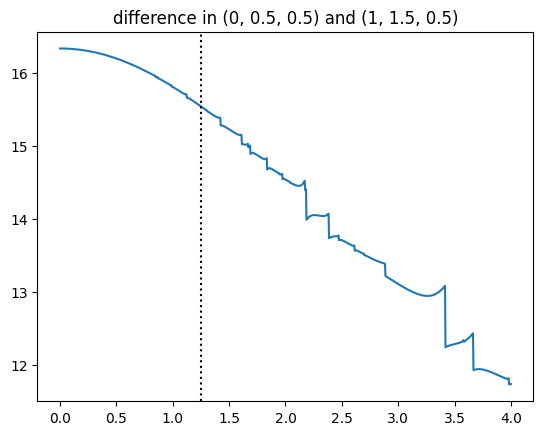

In [184]:
plt.plot(array_efield,np.subtract(eigenstates_of_N[labels.index(a[max_index][0:3])],eigenstates_of_N[labels.index((0,0.5,0.5))]))
plt.axvline(x=a[max_index][4],color='k',linestyle=':')
plt.title(f"difference in {ground_state} and {a[max_index][0:3]}")

# Finding pairs of other levels resonant with the same energy difference

In [185]:
ground_state=(0,0.5,0.5)
optimal_E_field_index=list(array_efield).index(a[max_index][4])
energies_at_ideal_E=array_eigenvalues_1[optimal_E_field_index]
ground_state_energy=eigenstates_of_N[labels.index((ground_state))][optimal_E_field_index]
transition_frequency_optimal=a[max_index][6]
coincidental_transitions=[]

total_index_of_optimal_excited_level=labels.index((a[max_index][0],a[max_index][1],a[max_index][2]))
for energy_index in range(0,len(energies_at_ideal_E)):
    #print(energy_index)

    delta=abs(energies_at_ideal_E[energy_index] - ground_state_energy)
    # if difference is less than 100 MHz (i.e 0.1 GHz)
    if ((abs(delta - transition_frequency_optimal)<0.1) and energy_index!=state_indices[optimal_E_field_index][total_index_of_optimal_excited_level]):
        coincidental_transitions.append(energy_index)

print("Other energy level indices resonant to the transmission frequency :",coincidental_transitions)
if(len(coincidental_transitions)!=0):
    #plt.plot(array_efield,array_eigenvalues_1[:,coincidental_transitions[1]])
    plt.plot(array_efield,array_eigenvalues_1[:,coincidental_transitions[0]])
    plt.plot(array_efield,array_eigenvalues_1[:,coincidental_transitions[0]+1])
    plt.plot(array_efield,eigenstates_of_N[labels.index((a[max_index][0],a[max_index][1],a[max_index][2]))][:],color='k')
    plt.axvline(x=a[max_index][4],color='k',linestyle=':')
    #plt.ylim(-1605,-1600)
  #plt.ylim(-1603,-1602)

Other energy level indices resonant to the transmission frequency : []


In [186]:
grnd_state_array=a[max_index][10]
excited_state_array=a[max_index][11]
up=excited_state_array
down=grnd_state_array
two_state_array=[[up,up],[up,down],[down,up],[down,down]]


In [187]:
max_mj=np.max(np.array(labels_of_all_original_states)[:,3])
min_mj=np.min(np.array(labels_of_all_original_states)[:,3])
mjs_considered=2*max_mj+1
classified_mj_indices_all_states=[[] for _ in range(int(mjs_considered) )]
for temp_index in range(len(labels_of_all_original_states)):
    mj_class_index=int(labels_of_all_original_states[temp_index][3] + max_mj )
    #print(mj_class_index)
    #print(np.append(classified_mj_indices_all_states[mj_class_index],[temp_index],axis=0))
    classified_mj_indices_all_states[mj_class_index].append(temp_index)
    #print(classified_mj_indices_all_states[mj_class_index])

In [188]:
#np.shape(classified_mj_indices_all_states)

In [189]:
np.shape(labels_of_all_original_states)

(502, 4)

In [190]:
def C3_first_term(statef1_array,statef2_array,statei1_array,statei2_array): #(1-3*cos(theat)^2)/2
    return 2*np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_0,statei1_array))*\
      np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_0,statei2_array)) +\
    np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_plus,statei1_array))* \
    np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_minus,statei2_array)) +\
    np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_minus,statei1_array))* \
    np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_plus,statei2_array)) 
   

In [191]:
def C3_second_term(statef1_array,statef2_array,statei1_array,statei2_array):
    #[[d+d+],[d-d-]]
     return [np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_plus,statei1_array))*\
      np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_plus,statei2_array)) ,\
    np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_minus,statei1_array))* \
    np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_minus,statei2_array)) ]

In [192]:
def C3_third_term(statef1_array,statef2_array,statei1_array,statei2_array):
    #[[d-d0 + d0d-],[d+d0 + d0d+]]
     return [np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_minus,statei1_array))*\
      np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_0,statei2_array)) + \
    np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_0,statei1_array))* \
    np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_minus,statei2_array)) ,
    np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_plus,statei1_array))*\
      np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_0,statei2_array)) + \
    np.matmul(np.transpose(np.conjugate(statef1_array)),np.matmul(dipole_values_0,statei1_array))* \
    np.matmul(np.transpose(np.conjugate(statef2_array)),np.matmul(dipole_values_plus,statei2_array)) ]

In [193]:
C3_first_term_matrix=np.zeros(shape=(4,4))
C3_second_term_matrix_minus_phi=np.zeros(shape=(4,4))
C3_second_term_matrix_plus_phi=np.zeros(shape=(4,4))
C3_third_term_matrix_plus_phi=np.zeros(shape=(4,4))
C3_third_term_matrix_minus_phi=np.zeros(shape=(4,4))

C3_net_matrix=np.zeros(shape=(4,4))
for i1 in range(len(C3_net_matrix)):
    for i2 in range(len(C3_net_matrix[0])):
        C3_first_term_matrix[i1][i2]=C3_first_term(two_state_array[i1][0],two_state_array[i1][1],\
                                                   two_state_array[i2][0],two_state_array[i2][1])
        
       # print(C3_second_term(two_state_array[i1][0],two_state_array[i1][1],\
                                                   #two_state_array[i2][0],two_state_array[i2][1])[0])
        
        C3_second_term_matrix_plus_phi[i1][i2]=C3_second_term(two_state_array[i1][0],two_state_array[i1][1],\
                                                   two_state_array[i2][0],two_state_array[i2][1])[0]
        
        C3_second_term_matrix_minus_phi[i1][i2]=C3_second_term(two_state_array[i1][0],two_state_array[i1][1],\
                                                   two_state_array[i2][0],two_state_array[i2][1])[1]
        
        C3_third_term_matrix_plus_phi[i1][i2]=C3_third_term(two_state_array[i1][0],two_state_array[i1][1],\
                                                   two_state_array[i2][0],two_state_array[i2][1])[0]
        
        C3_third_term_matrix_minus_phi[i1][i2]=C3_third_term(two_state_array[i1][0],two_state_array[i1][1],\
                                                   two_state_array[i2][0],two_state_array[i2][1])[0]




In [194]:
def C3_net(theta,phi):
    return    ((1-3*np.cos(theta)**2)/2)* C3_first_term_matrix \
    -(3*np.sin(theta)**2)/2 *(np.e**(-2*iota*phi)* C3_second_term_matrix_plus_phi  \
                             + np.e**(2*iota*phi)* C3_second_term_matrix_minus_phi  )\
    -3*np.sin(2*theta)/(2*np.sqrt(2))*(np.e**(iota*phi)* C3_third_term_matrix_plus_phi  \
                             - np.e**(-iota*phi)* C3_third_term_matrix_minus_phi  )

In [195]:
theta_range=np.linspace(0,np.pi,180)
phi_range=np.linspace(0,2*np.pi,360)
J_perp = np.zeros(shape=(len(theta_range),len(phi_range)),dtype=np.complex_)
J_parallel = np.zeros(shape=(len(theta_range),len(phi_range)),dtype=np.complex_)
h_z=np.zeros(shape=(len(theta_range),len(phi_range)),dtype=np.complex_)
V=np.zeros(shape=(len(theta_range),len(phi_range)),dtype=np.complex_)
for theta_index in range(len(theta_range)):
    for phi_index in range(len(phi_range)):
        C3_temp=C3_net(theta_range[theta_index],phi_range[phi_index])
        #J_par_1= 2*(C3_temp[0][0] + C3_temp[3][3])
        #J_par_2= -4*(C3_temp[1][1])
        #print(abs(J_par_1-J_par_2)<10**-3)
        J_parallel[theta_index][phi_index]=(C3_temp[0][0] + C3_temp[3][3])-(C3_temp[1][1] + C3_temp[2][2])
        V[theta_index][phi_index]=(C3_temp[0][0] + C3_temp[3][3]+C3_temp[1][1] + C3_temp[2][2])/4
        J_perp[theta_index][phi_index]=2*C3_temp[1][2]
        #print(2*C3_temp[1][2])
        h_z[theta_index][phi_index]=(C3_temp[0][0]-C3_temp[3][3])/2
 



In [ ]:
J_perp[]

In [56]:
plt.plot(phi_range,J_perp[180,:].imag)

IndexError: index 180 is out of bounds for axis 0 with size 180

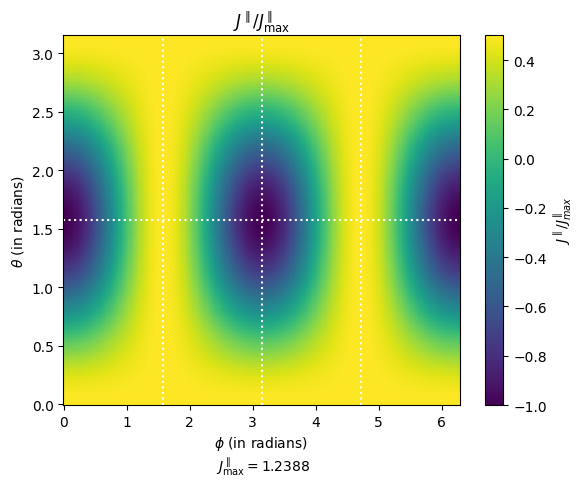

In [196]:
pc=plt.pcolormesh(phi_range,theta_range,J_parallel.real/np.max(abs(J_parallel.real)))
plt.xlabel(f"$ \phi $ (in radians) \n $J^\parallel_\max={np.round(abs(np.max(J_parallel.real)),4)}$")
plt.ylabel(r"$ \theta $ (in radians)")
plt.title(f"$J^\parallel / J^\parallel_\max $")
colorbar=plt.colorbar(pc)

plt.axhline(y=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=3*np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi,linestyle='dotted',color='white')

colorbar.set_label("$ J^{\parallel}/J^{\parallel}_{max} $")


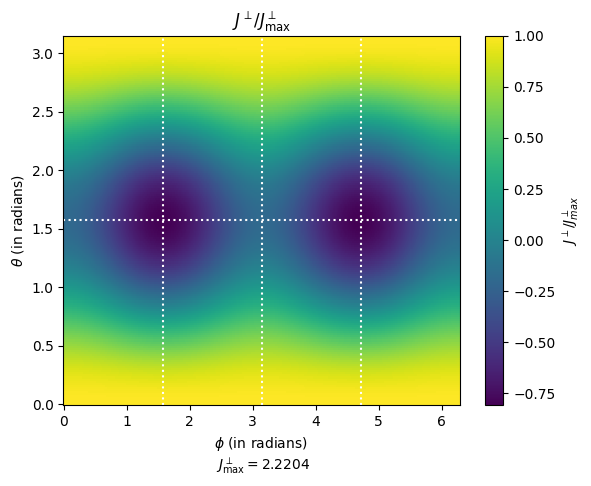

In [197]:
pc=plt.pcolormesh(phi_range,theta_range,J_perp.real/np.max(abs(J_perp.real)))
plt.xlabel(f"$ \phi $ (in radians) \n $J^\perp_\max={np.round(abs(np.max(J_perp.real)),4)}$")
plt.ylabel(r"$ \theta $ (in radians)")
plt.title(f"$J^\perp / J^\perp_\max $")
colorbar=plt.colorbar(pc)

plt.axhline(y=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=3*np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi,linestyle='dotted',color='white')

colorbar.set_label("$ J^{\perp}/J^{\perp}_{max} $")


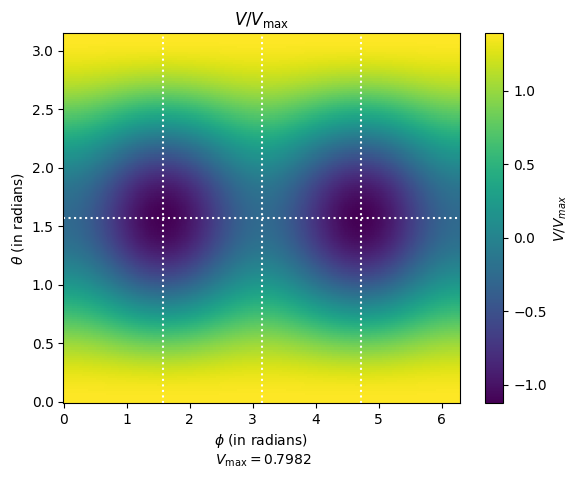

In [198]:
pc=plt.pcolormesh(phi_range,theta_range,J_perp.real/np.max(abs(V.real)))
plt.xlabel(f"$ \phi $ (in radians) \n $V_\max={np.round(abs(np.max(V.real)),4)}$")
plt.ylabel(r"$ \theta $ (in radians)")
plt.title("$V / V_{\max} $")
colorbar=plt.colorbar(pc)

plt.axhline(y=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=3*np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi,linestyle='dotted',color='white')

colorbar.set_label("$ V/V_{max} $")

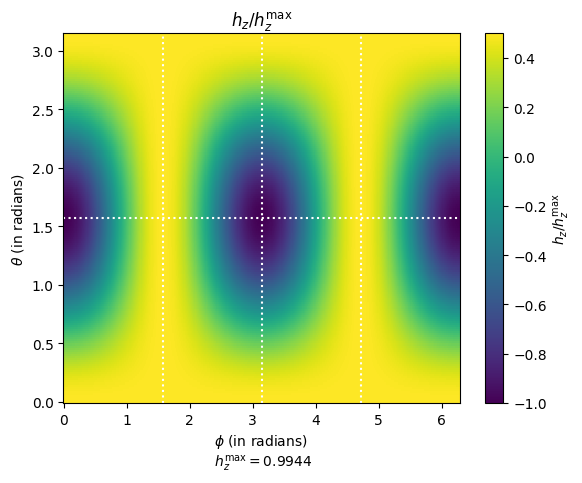

In [199]:
pc=plt.pcolormesh(phi_range,theta_range,h_z.real/(np.max(abs(h_z.real))))
plt.xlabel(f"$ \phi $ (in radians) \n $h_z^\max={np.round(abs(np.max(h_z.real)),4)}$")
plt.ylabel(r"$ \theta $ (in radians)")
plt.title(f"$h_z/ h_z^\max $")
colorbar=plt.colorbar(pc)

plt.axhline(y=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=3*np.pi/2,linestyle='dotted',color='white')
plt.axvline(x=np.pi,linestyle='dotted',color='white')

colorbar.set_label("$ h_z/h_z^\max$")

In [200]:
x_=np.kron(np.sin(theta_range),np.cos(phi_range))
y_=np.kron(np.sin(theta_range),np.sin(phi_range))
z_=np.kron(np.cos(theta_range),np.full(shape=len(phi_range),fill_value=1))


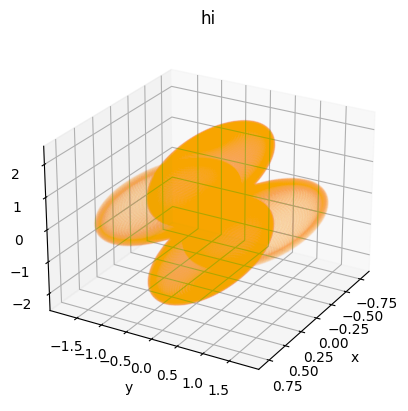

In [201]:

ax = plt.axes(projection='3d') 
x_plot=np.multiply(abs(J_perp.real).flatten(),x_)
y_plot=np.multiply(abs(J_perp.real).flatten(),y_)
z_plot=np.multiply(abs(J_perp.real).flatten(),z_)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("hi")
ax.scatter3D(x_plot,y_plot,z_plot,alpha=0.01,color='orange')
#for azim in range(0,90,20):
 #       ax.view_init(elev=10., azim=azim)
  #      plt.savefig("movie%d.png" % azim)

ax.view_init(elev=25, azim=30)
#ax.plot_surface(x_plot,y_plot,)
plt.show()



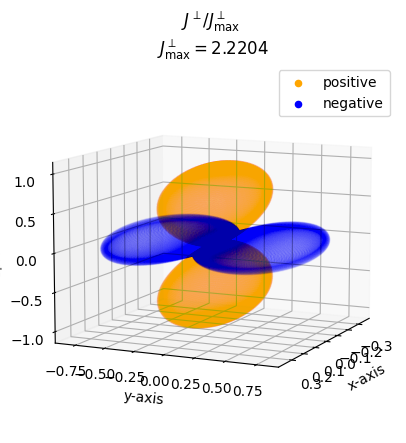

In [202]:

ax = plt.axes(projection='3d') 
x_plot=np.multiply(abs(J_perp.real).flatten(),x_)/np.max(abs(J_perp.real))
y_plot=np.multiply(abs(J_perp.real).flatten(),y_)/np.max(abs(J_perp.real))
z_plot=np.multiply(abs(J_perp.real).flatten(),z_)/np.max(abs(J_perp.real))
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title(f"$J^\perp / J^\perp_\max$ \n $J^\perp _\max = {np.round(np.max(abs(J_perp.real)),4)}$")
ax.scatter3D(x_plot[J_perp.real.flatten()>0],y_plot[J_perp.real.flatten()>0],z_plot[J_perp.real.flatten()>0],alpha=0.01,color='orange')
ax.scatter3D(x_plot[J_perp.real.flatten()<0],y_plot[J_perp.real.flatten()<0],z_plot[J_perp.real.flatten()<0],alpha=0.01,color='blue')
ax.scatter3D(0,0,0,color='orange',label='positive')
ax.scatter3D(0,0,0,color='blue',label='negative')

plt.legend()
ax.view_init(elev=10, azim=25)


#for azim in range(0,200,10):
        #ax.view_init(elev=10., azim=azim)
       # plt.savefig("j_per_gif%d.png" % azim)

#z_plot_minus=z_plot[J_perp.real.flatten()<0]
#x_plot_minus=x_plot[J_perp.real.flatten()<0]
#y_plot_minus=y_plot[J_perp.real.flatten()<0]
#ax.scatter3D(x_plot_minus,y_plot_minus,z_plot_minus,alpha=0.01,color='blue',label='negative')
#ax.plot_surface(x_plot,y_plot,)
plt.show()




In [93]:
import imageio
frames = []
for azim in range(0,200,10):
    image = imageio.v2.imread("j_per_gif%d.png" % azim)
    frames.append(image)
imageio.mimsave('./j_per_final_gif.gif', # output gif
                frames,          # array of input frames
                duration = 200) 

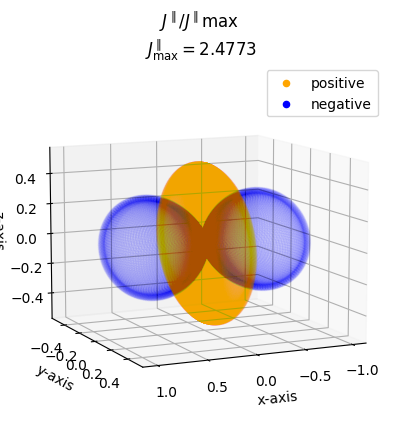

In [204]:

ax = plt.axes(projection='3d') 
x_plot=np.multiply(abs(J_parallel.real).flatten(),x_)/np.max(abs(J_parallel.real))
y_plot=np.multiply(abs(J_parallel.real).flatten(),y_)/np.max(abs(J_parallel.real))
z_plot=np.multiply(abs(J_parallel.real).flatten(),z_)/np.max(abs(J_parallel.real))

ax.scatter3D(x_plot[J_parallel.real.flatten()>0],y_plot[J_parallel.real.flatten()>0],z_plot[J_parallel.real.flatten()>0],alpha=0.01,color='orange')
ax.scatter3D(x_plot[J_parallel.real.flatten()<0],y_plot[J_parallel.real.flatten()<0],z_plot[J_parallel.real.flatten()<0],alpha=0.01,color='blue')
ax.scatter3D(0,0,0,color='orange',label='positive')
ax.scatter3D(0,0,0,color='blue',label='negative')

plt.legend()
ax.view_init(elev=10, azim=65)
ax.set_title(f"$J^\parallel / J^\parallel\max$ \n $J^\parallel _\max = {np.round(np.max(abs(J_parallel.real)),4)}$")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
#for azim in range(0,200,10):
        #ax.view_init(elev=10., azim=azim)
        #plt.savefig("j_par_gif%d.png" % azim)

#z_plot_minus=z_plot[J_perp.real.flatten()<0]
#x_plot_minus=x_plot[J_perp.real.flatten()<0]
#y_plot_minus=y_plot[J_perp.real.flatten()<0]
#ax.scatter3D(x_plot_minus,y_plot_minus,z_plot_minus,alpha=0.01,color='blue',label='negative')
#ax.plot_surface(x_plot,y_plot,)
plt.show()




In [100]:
import imageio
frames = []
for azim in range(0,200,10):
    image = imageio.v2.imread("j_par_gif%d.png" % azim)
    frames.append(image)
imageio.mimsave('./j_par_final_gif.gif', # output gif
                frames,          # array of input frames
                duration = 200)         # optional: frames per second

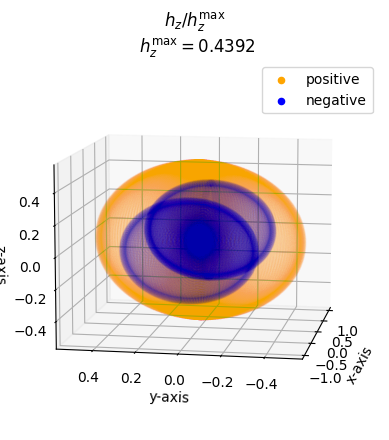

In [103]:

ax = plt.axes(projection='3d') 
x_plot=np.multiply(abs(h_z.real).flatten(),x_)/np.max(abs(h_z.real))
y_plot=np.multiply(abs(h_z.real).flatten(),y_)/np.max(abs(h_z.real))
z_plot=np.multiply(abs(h_z.real).flatten(),z_)/np.max(abs(h_z.real))
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title(f"$h_z / h_z^\max$ \n $h_z^\max = {np.round(np.max(abs(h_z.real)),4)}$")
ax.scatter3D(x_plot[h_z.real.flatten()>0],y_plot[h_z.flatten()>0],z_plot[h_z.flatten()>0],alpha=0.01,color='orange')
ax.scatter3D(x_plot[h_z.flatten()<0],y_plot[h_z.flatten()<0],z_plot[h_z.real.flatten()<0],alpha=0.01,color='blue')
ax.scatter3D(0,0,0,color='orange',label='positive')
ax.scatter3D(0,0,0,color='blue',label='negative')

plt.legend()
#ax.view_init(elev=10, azim=80)


for azim in range(0,200,10):
        ax.view_init(elev=10., azim=azim)
        plt.savefig("h_z_gif%d.png" % azim)

#z_plot_minus=z_plot[J_perp.real.flatten()<0]
#x_plot_minus=x_plot[J_perp.real.flatten()<0]
#y_plot_minus=y_plot[J_perp.real.flatten()<0]
#ax.scatter3D(x_plot_minus,y_plot_minus,z_plot_minus,alpha=0.01,color='blue',label='negative')
#ax.plot_surface(x_plot,y_plot,)
plt.show()




In [104]:
import imageio
frames = []
for azim in range(0,200,10):
    image = imageio.v2.imread("h_z_gif%d.png" % azim)
    frames.append(image)
imageio.mimsave('./h_z.gif', # output gif
                frames,          # array of input frames
                duration = 200)         # optional: frames per second

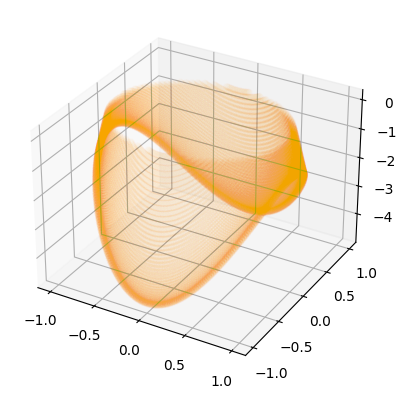

In [126]:
ax = plt.axes(projection='3d') 

z_plot_minus=J_perp.real[J_perp.real<0]
x_plot_minus=x_[J_perp.real.flatten()<0]
y_plot_minus=y_[J_perp.real.flatten()<0]
ax.scatter3D(x_plot_minus,y_plot_minus,z_plot_minus,alpha=0.01,color='orange')
plt.show()

In [106]:
import imageio
frames = []
for azim in range(0,90,20):
    image = imageio.v2.imread("movie%d.png" % azim)
    frames.append(image)
imageio.mimsave('./example.gif', # output gif
                frames,          # array of input frames
                duration = 500)         # optional: frames per second

In [ ]:
#import plotly.graph_objects as go


#fig = go.Figure(data=[go.Surface(z=z_plot, x=x_plot, y=y_plot)])
#fig.update_layout(title="Change in kappa",xaxis_title="C_o",yaxis_title="N",
 #                 width=500, height=500,
#                  margin=dict(l=65, r=50, b=65, t=90))
#fig.update_layout(title="Change in kappa",xaxis_title="C_o",yaxis_title="N")

#fig.show()

In [178]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.scatter(xx,yy,zz, marker='o', s=20, c="goldenrod", alpha=0.6)
for ii in xrange(0,360,1):
    ax.view_init(elev=10., azim=ii)
    savefig("movie%d.png" % ii)

NameError: name 'fig' is not defined

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
z = temp

fig = go.Figure(data=[go.Surface(z= J_perp, x=np.array(x_coords)/C_o, y=np.array(y_coords))])
fig.update_layout(title="Change in kappa",xaxis_title="C_o",yaxis_title="N",
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

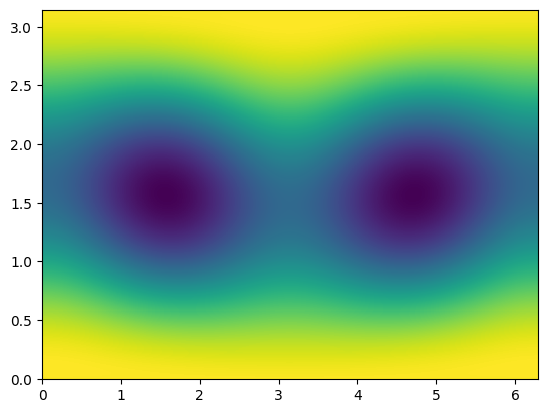

In [107]:
plt.pcolormesh(phi_range,theta_range,J_perp.real)

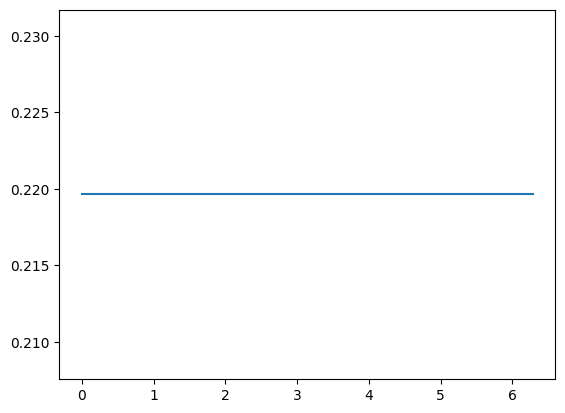

In [103]:
plt.plot(phi_range,h_z[180,:])

In [56]:
print(C3_net(np.pi/2,0))

[[-0.91332609+0.j  1.44261766+0.j  1.44261766+0.j -4.02275053+0.j]
 [ 1.44261766+0.j -0.17819804+0.j -0.53453903+0.j  0.28146754+0.j]
 [ 1.44261766+0.j -0.53453903+0.j -0.17819804+0.j  0.28146754+0.j]
 [-4.02275053+0.j  0.28146754+0.j  0.28146754+0.j -0.03476802+0.j]]



# C3  matrix

$\begin{matrix}
  -0.91341019 &  1.43077356 & 1.43077356 &-4.02035871\\
  1.43077356 & -0.16607245 & -0.53253678 & 0.26423137\\
  1.43077356 & -0.53253678 & -0.16607245 & 0.26423137\\
  -4.02035871 & 0.26423137 & 0.26423137 & 0.01718914
 \end{matrix}$

In [74]:
def two_level_matrix_element(statef1_array,statef2_array,statei1_array,statei2_array,theta_in,phi_in=0,threshhold=0.05):
    
    max_a1=np.max(abs(statef1_array))
    max_a2=np.max(abs(statef2_array))
    max_a3=np.max(abs(statei1_array))
    max_a4=np.max(abs(statei2_array))
    
    
    a1=np.where(abs(statef1_array)>=max_a1*threshhold)
    a2=np.where(abs(statef2_array)>=max_a2*threshhold)
    a3=np.where(abs(statei1_array)>=max_a3*threshhold)
    a4=np.where(abs(statei2_array)>=max_a4*threshhold)
    non_zero_coeff=np.intersect1d(np.intersect1d(np.intersect1d(a1,a2),a3),a4)
    #print("as:",a1,a2,a3,a4)
    
    C3=0
    for indexi1 in non_zero_coeff :
        print(indexi1,end='\r')
        for indexi2 in non_zero_coeff:
            #if (abs(statei1_array[indexi1]<threshold*10**-4):
             #   continue
            for indexf1 in non_zero_coeff:
              #  if (abs(statei1_array[indexi1]*statei1_array[indexi1]*statef1_array[indexf1])<threshold*10**-4):
               #     continue
                for indexf2 in non_zero_coeff:
                #    if (abs(statei1_array[indexi1]*statei1_array[indexi1]*statef1_array[indexf1]*statef2_array[indexf2])<threshold*10**-4):
                 #       continue
                    coeff=statef1_array[indexf1]*statef2_array[indexf2]*statei1_array[indexi1]*statei2_array[indexi2]
                    #print(coeff)
                    C3+=coeff*getDipoleDipole(labels_of_all_original_states[indexf1],labels_of_all_original_states[indexi1],\
                                                    labels_of_all_original_states[indexf2],labels_of_all_original_states[indexi2],theta=theta_in,phi=phi_in)
    return C3         

In [52]:
np.min(abs(grnd_state_array))

2.011516813158302e-18

In [53]:
np.min(abs(excited_state_array))

2.470401787552641e-19

In [54]:
labels_of_all_original_states[483]

(48, 1, 1.5, 1.5)

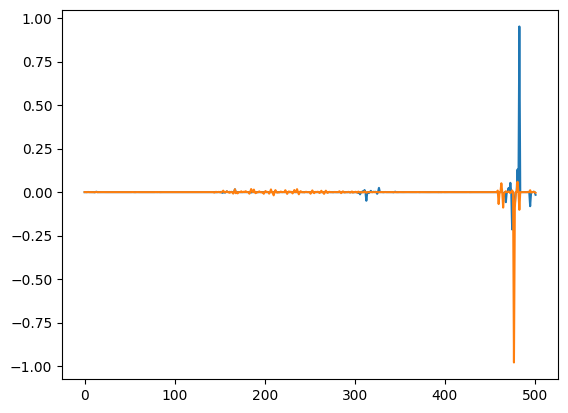

In [55]:
plt.plot(range(dim),excited_state_array)
plt.plot(range(dim),grnd_state_array)

In [84]:
C3_11=two_level_matrix_element(grnd_state_array,excited_state_array,excited_state_array,grnd_state_array,theta_in=0,phi_in=0,threshhold=0.00007)

KeyboardInterrupt: 

In [128]:
C3_first_term(up,up,up,up,theta_in=np.pi/2)

-0.5201962636943728

In [158]:
labels_of_all_original_states[477]
labels_of_all_original_states[483]

(48, 1, 1.5, 1.5)

In [159]:
dipole_values[477][483]



1.70143747374872

In [161]:
dipole_values[477][477]

0.0

In [ ]:
two_level_matrix_element(up,up,up,down,threshhold=0.001,theta_in=np.pi)

In [99]:
two_level_matrix_element(up,up,up,down,threshhold=0.0005,theta_in=np.pi)

(-0.715386781652769+0j)

In [ ]:
two_level_matrix_element(down,up,up,up,threshhold=0.001,theta_in=np.pi)

In [149]:
two_level_matrix_element(down,down,down,down,threshhold=0.01,theta_in=np.pi)

(0.015224863368867896+0j)

In [148]:
two_level_matrix_element(down,down,down,down,threshhold=0.005,theta_in=np.pi)

(0.01718913910326349+0j)

In [136]:
len(matrix_rows[index_temp_1][0])

502

In [85]:
matrix_rows=[[up,up],[up,down],[down,up],[down,down]]

In [ ]:
C3_matrix=np.zeros(shape=(4,4))
for index_temp_1 in range(0,4):
    #print(index_temp_1,end='\n')
    for index_temp_2 in range(0,4):
        print(index_temp_1," " ,index_temp_2,end='\r')
        C3_matrix[index_temp_1][index_temp_2]=two_level_matrix_element(matrix_rows[index_temp_1][0],matrix_rows[index_temp_1][1],\
                                                                    matrix_rows[index_temp_2][0],matrix_rows[index_temp_2][1],\
                                                                    threshhold=0.0005,theta_in=np.pi/2)
        
    
        

In [151]:
C3_matrix[3][3]=0.01718913910326349


In [89]:
H_single_atom=np.array([[[H_gg],[0]],[[0],[H_uu]]])

NameError: name 'H_uu' is not defined

In [41]:
iota=complex(0,1)

def getDipoleDipole(state_f1, state_i1,state_f2, state_i2,theta,phi=0):
    q1 = state_f1[3]-state_i1[3]
    q2 = state_f2[3]-state_i2[3]
    
    f1_index=labels_of_all_original_states.index(state_f1)
    f2_index=labels_of_all_original_states.index(state_f2)
    i1_index=labels_of_all_original_states.index(state_i1)
    i2_index =labels_of_all_original_states.index(state_i2)
    
    Q=(q1+1)*10 + (q2+1)
    
    
    match Q:
        case 11:
            factor= (1-3*np.cos(theta)**2)
        case 20:
            factor= (1-3*np.cos(theta)**2)/2
        case 2:
            factor= (1-3*np.cos(theta)**2)/2
        case 22:
            factor= (-3*np.sin(theta)**2)/2 * np.exp(-2*iota*phi)
        case 0:
            factor= (-3*np.sin(theta)**2)/2 * np.exp(2*iota*phi)
        case 1:
            factor= -3*np.sin(2*theta)/(2*np.sqrt(2))*np.exp(iota*phi)
        case 10:
            factor= -3*np.sin(2*theta)/(2*np.sqrt(2))*np.exp(iota*phi)
        case 21:
            factor= 3*np.sin(2*theta)/(2*np.sqrt(2))*np.exp(-iota*phi)
        case 12:
            factor= 3*np.sin(2*theta)/(2*np.sqrt(2))*np.exp(-iota*phi)
        case other:
            factor=0
            #print("error in getDipoleDipole")
    return factor*dipole_values[f1_index][i1_index]*dipole_values[f2_index][i2_index]


In [87]:
4*pi.coulombs_constant/(5**3)

0.019056687241693786

In [88]:
a[max_index][9]*reference_electric_dipole_moment/100 * a[max_index][4]

-5.552548565384284

In [47]:
### perturbation still valid

In [90]:
# unperturbed grund state energy
H_gg=0
for index_temp in range(len(labels_of_all_original_states)):
    state_temp=pi.StateOne("Rb",int(labels_of_all_original_states[index_temp][0]),int(labels_of_all_original_states[index_temp][1]),\
                                                                         float(labels_of_all_original_states[index_temp][2]),float(labels_of_all_original_states[index_temp][3]))
    H_gg+=(abs(down[index_temp])**2 )*state_temp.getEnergy() 
print(H_gg)

-1633.9034912284242


In [64]:
#actual ground state energy
a[max_index][7]

-1634.0457043481354

In [163]:
# unperturbed ground state energy
H_uu=0
for index_temp in range(len(labels_of_all_original_states)):
    state_temp=pi.StateOne("Rb",int(labels_of_all_original_states[index_temp][0]),int(labels_of_all_original_states[index_temp][1]),\
                                                                         float(labels_of_all_original_states[index_temp][2]),float(labels_of_all_original_states[index_temp][3]))
    H_uu+=(abs(up[index_temp])**2 )*state_temp.getEnergy() 
print(H_uu)

-1598.0900547987235


In [164]:
#actual excited state energy
a[max_index][8]

-1599.6234821797975

In [165]:
d_gg=0
for i1 in range(dim):
    for i2 in range(dim):
        d_gg+= dipole_values[i1][i2] * np.conjugate(down[i1])* down[i2]  

In [166]:
d_gg= np.matmul(np.transpose(np.conjugate(down)),np.matmul(dipole_values,down))
print(d_gg)

-2.3439583607398617e-14


In [167]:
E=a[max_index][4]


In [168]:
d_uu= np.matmul(np.transpose(np.conjugate(up)),np.matmul(dipole_values,up))
print(d_uu*E)

2.351309837524542e-13


In [169]:
magnetic_dipole_values=np.zeros(shape=(dim,dim))
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        magnetic_dipole_values[indexfinal][indexinit]=cache.getMagneticDipole(statefinal, stateinit)
     
    
    

In [170]:
d_gg= np.matmul(np.transpose(np.conjugate(down)),np.matmul(magnetic_dipole_values,down))
print(d_gg*160)

-0.24010592943966513


In [171]:
u_gg= np.matmul(np.transpose(np.conjugate(up)),np.matmul(magnetic_dipole_values,up))
print(u_gg*160)

-0.3531229821869929


In [104]:
H_single_atom=[[[H_uu],[0]],[[0],[H_gg]]]

In [172]:
import qutip as qtp

In [173]:
H_unperturbed_single_atom=qtp.Qobj([[H_uu,0],[0,H_gg]])
I_2=qtp.qeye(2)
H_unperturbed_two_atoms=qtp.tensor(H_unperturbed_single_atom,I_2) + qtp.tensor(I_2,H_unperturbed_single_atom)
print(H_unperturbed_two_atoms)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-3196.1801096      0.             0.             0.        ]
 [    0.         -3231.99354603     0.             0.        ]
 [    0.             0.         -3231.99354603     0.        ]
 [    0.             0.             0.         -3267.80698246]]


In [174]:
E_x,E_y,E_z=E,0,0
E_plus=-(E_x+iota*E_y)/(np.sqrt(2))
E_minus=(E_x-iota*E_y)/(np.sqrt(2))
E_0=E_z
dE_values=np.zeros(shape=(dim,dim),dtype=np.complex_)
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        q= float(labels_of_all_original_states[indexinit][3])- float(labels_of_all_original_states[indexfinal][3])
        match q:
            case 1:
                factor=E_minus
            case -1 :
                factor=E_plus
            case 0:
                factor=E_z
            case other :
                factor=0
        dE_values[indexfinal][indexinit]=cache.getElectricDipole(statefinal, stateinit)*factor
     
    

In [175]:

d_uu=np.matmul(np.conjugate(np.transpose(up)),np.matmul(dE_values,up))
#print(d_uu)
d_gg=np.matmul(np.conjugate(np.transpose(down)),np.matmul(dE_values,down))
#print(d_gg)
d_ug=np.matmul(np.conjugate(np.transpose(up)),np.matmul(dE_values,down))
#print(d_ug)
d_gu=np.matmul(np.conjugate(np.transpose(down)),np.matmul(dE_values,up))
#print(d_gu)

d_dot_E=[[d_uu,d_ug],[d_gu,d_gg]]
print(d_dot_E)

d_dot_E_single_atom=qtp.Qobj(d_dot_E)
I_2=qtp.qeye(2)
d_dot_E_two_atoms=qtp.tensor(d_dot_E_single_atom,I_2) + qtp.tensor(I_2,d_dot_E_single_atom)
print(d_dot_E_two_atoms)


[[(2.0090414389468885+0j), (-3.173322984269515+0j)], [(-3.1733229842695136+0j), (0.39198185095160765+0j)]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.01808288 -3.17332298 -3.17332298  0.        ]
 [-3.17332298  2.40102329  0.         -3.17332298]
 [-3.17332298  0.          2.40102329 -3.17332298]
 [ 0.         -3.17332298 -3.17332298  0.7839637 ]]


In [176]:
B=160 # gauss
B_x,B_y,B_z=0,0,B
B_plus=-(B_x+iota*B_y)/(np.sqrt(2))
B_minus=(B_x-iota*B_y)/(np.sqrt(2))
B_0=B_z
mu_B_values=np.zeros(shape=(dim,dim),dtype=np.complex_)
for indexinit in range(dim):
    for indexfinal in range(dim):
        stateinit=pi.StateOne("Rb",int(labels_of_all_original_states[indexinit][0]),\
                                        int(labels_of_all_original_states[indexinit ][1]),\
                                        float(labels_of_all_original_states[indexinit ][2]),\
                                        float(labels_of_all_original_states[indexinit ][3]))
        statefinal=pi.StateOne("Rb",int(labels_of_all_original_states[indexfinal][0]),\
                                        int(labels_of_all_original_states[indexfinal][1]),\
                                        float(labels_of_all_original_states[indexfinal][2]),\
                                        float(labels_of_all_original_states[indexfinal][3]))
        q= float(labels_of_all_original_states[indexinit][3])- float(labels_of_all_original_states[indexfinal][3])
        match q:
            case 1:
                factor=B_minus
            case -1 :
                factor=B_plus
            case 0:
                factor=B_z
            case other :
                factor=0
        mu_B_values[indexfinal][indexinit]=cache.getMagneticDipole(statefinal, stateinit)*factor
     
    

In [177]:
mu_uu=np.matmul(np.conjugate(np.transpose(up)),np.matmul(mu_B_values,up))
#print(d_uu) 
mu_gg=np.matmul(np.conjugate(np.transpose(down)),np.matmul(mu_B_values,down))
#print(d_gg)
mu_ug=np.matmul(np.conjugate(np.transpose(up)),np.matmul(mu_B_values,down))
#print(d_ug)
mu_gu=np.matmul(np.conjugate(np.transpose(down)),np.matmul(mu_B_values,up))
#print(d_gu)

mu_dot_B=[[mu_uu,mu_ug],[mu_gu,mu_gg]]
print(d_dot_E)

mu_dot_B_single_atom=qtp.Qobj(mu_dot_B)
I_2=qtp.qeye(2)
mu_dot_B_two_atoms=qtp.tensor(mu_dot_B_single_atom,I_2) + qtp.tensor(I_2,mu_dot_B_single_atom)
print(mu_dot_B_two_atoms)

[[(2.0090414389468885+0j), (-3.173322984269515+0j)], [(-3.1733229842695136+0j), (0.39198185095160765+0j)]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-0.88650766  0.02550481  0.02550481  0.        ]
 [ 0.02550481 -0.66689965  0.          0.02550481]
 [ 0.02550481  0.         -0.66689965  0.02550481]
 [ 0.          0.02550481  0.02550481 -0.44729164]]


In [178]:
print("H_unperturbed",H_unperturbed_two_atoms)
print("d dot E term",d_dot_E_two_atoms)
print("mu dot B term",mu_dot_B_two_atoms)
print("C3 in energy units with atomic dist = 6 mu m",C3_matrix * pi.coulombs_constant/(6**3))

H_unperturbed Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-3196.1801096      0.             0.             0.        ]
 [    0.         -3231.99354603     0.             0.        ]
 [    0.             0.         -3231.99354603     0.        ]
 [    0.             0.             0.         -3267.80698246]]
d dot E term Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.01808288 -3.17332298 -3.17332298  0.        ]
 [-3.17332298  2.40102329  0.         -3.17332298]
 [-3.17332298  0.          2.40102329 -3.17332298]
 [ 0.         -3.17332298 -3.17332298  0.7839637 ]]
mu dot B term Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-0.88650766  0.02550481  0.02550481  0.        ]
 [ 0.02550481 -0.66689965  0.          0.02550481]
 [ 0.02550481  0.         -0.66689965  0.02550481]
 [ 0.          0.02550481  0.02550481 -0.44729164]]
C3 in en

In [114]:
C3_matrix=np.array([[-0.91341019, 1.43077356,  1.43077356, -4.02035871],
 [ 1.43077356 ,-0.16607245, -0.53253678 , 0.26423137],
 [ 1.43077356 ,-0.53253678, -0.16607245 , 0.26423137],
 [-4.02035871 , 0.26423137,  0.26423137  ,0.01718914]])

In [152]:
print(C3_matrix)

[[-0.91341019  1.43077356  1.43077356 -4.02035871]
 [ 1.43077356 -0.16607245 -0.53253678  0.26423137]
 [ 1.43077356 -0.53253678 -0.16607245  0.26423137]
 [-4.02035871  0.26423137  0.26423137  0.01718914]]


In [79]:
print(C3_11) #0.03

(2.8006098925382905+0j)


In [81]:
print(C3_11)#0.001

(2.8803518066430445+0j)


In [83]:
print(C3_11) #0.0005

(2.8821348386757557+0j)


In [43]:
print(C3_11)

(0.01718913910326349+0j)


In [40]:
print(C3_11)

(0.015224863368867896+0j)


In [195]:
C3_11

(0.016264455924662666+0j)

In [197]:
C3_11

(0.016986116147448146+0j)

In [ ]:
two_level_matrix_element(grnd_state_array,grnd_state_array,excited_state_array,excited_state_array,theta_in=0,phi_in=0)

In [188]:
x=np.where(abs(dipole_values)<10000)

In [189]:
np.max(dipole_values[x])

2.7435767222914778

In [123]:
sum_

(3.891230269026129e-06+0j)

In [126]:
sum_

(3.891267645079943e-06+0j)

In [140]:
sum_

(3.890436154929682e-06+0j)

In [136]:
sum_

(3.883218337030985e-06+0j)

In [ ]:
from numba import jit
import numpy as np

x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

print(go_fast(x))

In [70]:
for itemp in range(len(optimal_eigenvalues)):
    if(optimal_eigenvalues[itemp]>optimal_eigenvalues[itemp]):
        print("Not ascending")


In [77]:
x=optimal_eigenvectors[np.array(state_indices)[optimal_E_field_index][labels.index((1,1.5,-0.5))]]

In [79]:
print(np.argmax(abs(x)))

407


In [80]:
labels_of_all_original_states[np.argmax(abs(x))]

(46, 7, 6.5, 6.5)

In [56]:
labels_of_all_original_states[184]

(45, 4, 4.5, 3.5)

In [ ]:
for temp in range(len(labels)):
    print(labels_of_all_original_states.index()==state_indices[0][temp])

In [31]:
np.where(optimal_eigenvalues==a[max_index][8])4

(array([327], dtype=int64),)

In [40]:
print(abs(optimal_eigenvectors[184]))

  (0, 0)	1.9318788518683085e-17
  (0, 1)	1.3139895052642153e-05
  (0, 2)	4.200811979553699e-06
  (0, 3)	2.1549119134532844e-17
  (0, 4)	6.543643354127245e-05
  (0, 5)	4.061685278133623e-17
  (0, 6)	2.5736785469764445e-05
  (0, 7)	5.983935034874234e-17
  (0, 8)	1.702967966936196e-05
  (0, 9)	6.56510971860667e-17
  (0, 10)	0.0003279940125456324
  (0, 11)	1.1451786817429249e-17
  (0, 12)	5.896285519919714e-17
  (0, 13)	0.00020566958680609445
  (0, 14)	0.0012764596708443844
  (0, 15)	1.6959094875905288e-17
  (0, 16)	3.812801307142911e-05
  (0, 17)	1.1696018981036e-05
  (0, 18)	6.3462519752048385e-18
  (0, 19)	3.304351059272208e-17
  (0, 20)	6.80614012250557e-16
  (0, 21)	0.0005441189714194497
  (0, 22)	0.0003208525409393032
  (0, 23)	1.5311315364953494e-15
  (0, 24)	2.3293733718851224e-16
  :	:
  (0, 477)	7.250166379376067e-16
  (0, 478)	5.346294868703895e-15
  (0, 479)	0.0016953790153231096
  (0, 480)	0.00040029059538385255
  (0, 481)	5.8332406355574475e-18
  (0, 482)	1.3117930201253444e-

In [36]:
np.argmax(abs(noptimal_eigenvectors[184]))

305

In [38]:
max(abs(optimal_eigenvectors[184]))

<1x502 sparse matrix of type '<class 'numpy.float64'>'
	with 502 stored elements in Compressed Sparse Row format>

In [37]:
labels_of_all_original_states[305]

(46, 2, 1.5, -0.5)

In [167]:
a[max_index][13]


3.023023023023023

# Find the eigenvector and eigenenergy at the optimal point

In [173]:
E_min=a[max_index][12]
E_max=a[max_index][13]

system = pi.SystemOne("Rb", cache)
# Consider only states with similar energy and quantum numbers as the defined state
system.restrictN(N_lower, N_upper)
system.restrictL(0,l_lim)
state_n_lower=pi.StateOne("Rb",N-2,0,0.5,-0.5)
state_n_higher=pi.StateOne("Rb",N+2,0,0.5,0.5)
#print(E_upper_lim)
#print()
system.restrictEnergy(E_lower_lim, E_upper_lim)
system.setBfield([ 0,0,160])
system.setEfield([E_min,0,0])
system.diagonalize()
#temp=(system.getHamiltonian().diagonal())
#eigenvalues_at_this_E_field=temp
#transition_to_L,transition_to_J,transition_to_mj=labels[index]
state_temp_excited=pi.StateOne("Rb",int(N),int(a[max_index][0]),float(a[max_index][1]),float(a[max_index][2]))
state_temp_grnd=pi.StateOne("Rb",int(N),0,0.5,0.5)

overlaps_excited_state=system.getOverlap(state_temp_excited)
overlaps_grnd_state=system.getOverlap(state_temp_grnd)                
#print(np.argmax(abs(overlaps_excited_state)))
#print(max(abs(overlaps_excited_state)))
#print(np.argmax(abs(overlaps_grnd_state)))
#print(max(abs(overlaps_grnd_state)))
#eigenvalues_at_this_E_field = np.ravel(temp)
eigenvectors_at_this_E_field=system.getBasisvectors()
grnd_state_min_E_field= eigenvectors_at_this_E_field[:,np.argmax(abs(overlaps_grnd_state))]
excited_state_min_E_field=eigenvectors_at_this_E_field[:,np.argmax(abs(overlaps_excited_state))]                                
grnd_state_min_E_field=np.reshape(scipy.sparse.csc_matrix.toarray(grnd_state_min_E_field),(dim,))
#print(grnd_state_eigenvector_at_this_E_field)
excited_state_min_E_field=np.reshape(scipy.sparse.csc_matrix.toarray(excited_state_min_E_field),(dim,))                #print(excited_state_eigenvector_at_this_E_field)
#print("grndstate",labels_of_all_original_states[np.argmax(abs(grnd_state_eigenvector_at_this_E_field))])
#print("excitedstate",labels_of_all_original_states[np.argmax(abs(excited_state_eigenvector_at_this_E_field))])
#electric_dipole_moment_abs = dipole_matrix_element(grnd_state_eigenvector_at_this_E_field,excited_state_eigenvector_at_this_E_field)                 
#electric_dipole_moment_relative =electric_dipole_moment_abs*100 /reference_electric_dipole_moment
                
                

In [174]:
system = pi.SystemOne("Rb", cache)
# Consider only states with similar energy and quantum numbers as the defined state
system.restrictN(N_lower, N_upper)
system.restrictL(0,l_lim)
state_n_lower=pi.StateOne("Rb",N-2,0,0.5,-0.5)
state_n_higher=pi.StateOne("Rb",N+2,0,0.5,0.5)
#print(E_upper_lim)
#print()
system.restrictEnergy(E_lower_lim, E_upper_lim)
system.setBfield([ 0,0,160])
system.setEfield([E_max,0,0])
system.diagonalize()
#temp=(system.getHamiltonian().diagonal())
#eigenvalues_at_this_E_field=temp
#transition_to_L,transition_to_J,transition_to_mj=labels[index]
state_temp_excited=pi.StateOne("Rb",int(N),int(a[max_index][0]),float(a[max_index][1]),float(a[max_index][2]))
state_temp_grnd=pi.StateOne("Rb",int(N),0,0.5,0.5)

overlaps_excited_state=system.getOverlap(state_temp_excited)
overlaps_grnd_state=system.getOverlap(state_temp_grnd)                
#print(np.argmax(abs(overlaps_excited_state)))
#print(max(abs(overlaps_excited_state)))
#print(np.argmax(abs(overlaps_grnd_state)))
#print(max(abs(overlaps_grnd_state)))
#eigenvalues_at_this_E_field = np.ravel(temp)
eigenvectors_at_this_E_field=system.getBasisvectors()
grnd_state_max_E_field= eigenvectors_at_this_E_field[:,np.argmax(abs(overlaps_grnd_state))]
excited_state_max_E_field=eigenvectors_at_this_E_field[:,np.argmax(abs(overlaps_excited_state))]                                
grnd_state_max_E_field=np.reshape(scipy.sparse.csc_matrix.toarray(grnd_state_max_E_field),(dim,))
#print(grnd_state_eigenvector_at_this_E_field)
excited_state_max_E_field=np.reshape(scipy.sparse.csc_matrix.toarray(excited_state_max_E_field),(dim,))                #print(excited_state_eigenvector_at_this_E_field)
#print("grndstate",labels_of_all_original_states[np.argmax(abs(grnd_state_eigenvector_at_this_E_field))])
#print("excitedstate",labels_of_all_original_states[np.argmax(abs(excited_state_eigenvector_at_this_E_field))])
#electric_dipole_moment_abs = dipole_matrix_element(grnd_state_eigenvector_at_this_E_field,excited_state_eigenvector_at_this_E_field)                 
#electric_dipole_moment_relative =electric_dipole_moment_abs*100 /reference_electric_dipole_moment
                
                

In [177]:
abs(np.matmul(np.transpose(grnd_state_max_E_field),grnd_state_min_E_field) )**2   

0.9966608411378524

In [178]:
abs(np.matmul(np.transpose(excited_state_max_E_field),excited_state_min_E_field)  )**2  

0.9998353386951319

In [181]:
print(max(abs(optimal_grnd_state_eigenvector))**2)

  (0, 0)	0.96737150936181


In [191]:
print(optimal_grnd_state_eigenvector[0])

  (0, 0)	-0.00018901956814257196


In [135]:
def getDipoleDipolePure(statef1,statef2,statei1,statei2):
    indexfinal1=pure_state_indices.index(statef1)
    indexfinal2=pure_state_indices.index(statef2)
    indexinit=pure_state_indices.index(statei1)   
    indexinit2=pure_state_indices.index(statei2)
    q = statef1[3]- statei1[3] 
    p= statef2[3] -statei2[3]
    
    if q == 0 and p == 0:
        prefactor = -2
    elif q == 1 and p == -1:
        prefactor = -1
    elif q == -1 and p == 1:
        prefactor = -1
    else:
        return 0
    return (
        prefactor*dipole_values[indexfinal1][indexinit1]*dipole_values[indexfinal2][indexinit2]
    )




In [81]:
def dipoledipoleinteraction_old(array_statef1,array_statef2,array_statei1,array_statei2):
    sum_=0
    for indexf1 in range(dim):
        for indexf2 in range(dim):
            for indexi1 in range(dim):
                for indexi2 in range(dim):   
                    
                    coeff=np.conjugate(array_statef1[indexf1])*np.conjugate(array_statef2[indexf2])*array_statei1[indexi1]*array_statei2[indexi2]
                    q = labels_of_all_original_states[indexf1][3]- labels_of_all_original_states[indexi1][3] 
                    p=  labels_of_all_original_states[indexf2][3]- labels_of_all_original_states[indexi2][3]
                    if q == 0 and p == 0:
                        prefactor = -2
                    elif q == 1 and p == -1:
                        prefactor = -1
                    elif q == -1 and p == 1:
                        prefactor = -1
                    else:
                        continue
                    #if(abs(coeff) > 10**-2):
                    sum_+=coeff*prefactor*dipole_values[indexf1][indexi1]*dipole_values[indexf2][indexi2]
                    
        
    return(sum_)

In [219]:
array_labels_of_all_original_states=np.array(labels_of_all_original_states)

In [220]:
list_of_non_zero_dd_indices_plus=[]
list_of_non_zero_dd_indices_minus=[]
list_of_non_zero_dd_indices_no_change=[]
for index in range(len(array_labels_of_all_original_states)):
    N_,L_,J_,MJ_ = array_labels_of_all_original_states[index]
    
    temp_for_l=array_labels_of_all_original_states[:,1]
    temp_for_m=array_labels_of_all_original_states[:,3]
    
    temp_required_l=np.union1d(np.argwhere(temp_for_l==L_+1),np.argwhere(temp_for_l==L_-1))
    
    temp_required_m_plus=np.argwhere(temp_for_m==MJ_+1)
    temp_required_m_minus=np.argwhere(temp_for_m==MJ_-1)
    temp_required_m_no_change=np.argwhere(temp_for_m==MJ_)
    
    temp_valid_indices_plus=np.intersect1d(temp_required_m_plus,temp_required_l)
    
    temp_valid_indices_minus=np.intersect1d(temp_required_m_minus,temp_required_l)
    
    temp_valid_indices_no_change=np.intersect1d(temp_required_m_no_change,temp_required_l)
    
    list_of_non_zero_dd_indices_plus.append(temp_valid_indices_plus)
    
    list_of_non_zero_dd_indices_minus.append(temp_valid_indices_minus)
    list_of_non_zero_dd_indices_no_change.append(temp_valid_indices_no_change)

In [221]:
def dipoledipoleinteraction(array_statef1,array_statef2,array_statei1,array_statei2):
    sum_=0
    for i2 in range(dim):
        for i1 in range(dim):
            print(i2,i1,end='\r')
            # first states to which the m doesn't chnage
            for f2 in list_of_non_zero_dd_indices_no_change[i2]:
                for f1 in list_of_non_zero_dd_indices_no_change[i1]:
                    sum_+=-2*np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]*array_statei2[i2]*(dipole_values[f1][i1])*(dipole_values[f2][i2])
            for f2 in list_of_non_zero_dd_indices_plus[i2]:
                for f1 in list_of_non_zero_dd_indices_minus[i1]:
                    sum_+=-np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]*array_statei2[i2]*(dipole_values[f1][i1])*(dipole_values[f2][i2])
            for f2 in list_of_non_zero_dd_indices_minus[i2]:
                for f1 in list_of_non_zero_dd_indices_plus[i1]:
                    sum_+=-np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]*array_statei2[i2]*dipole_values[f1][i1]*dipole_values[f2][i2]
    return(sum_)

In [222]:
def getC3(array_grndstate,array_excitedstate):
    V=dipoledipoleinteraction(array_excitedstate,array_grndstate,array_grndstate,array_excitedstate)
    return(np.abs(V)**2)

In [223]:
def vanderWaalsinteraction(array_statef1,array_statef2,array_statei1,array_statei2):
    sum_=0
    for i2 in range(dim):
        print(i2,end='\r')
        for i1 in range(dim):

            # first states to which the m doesn't chnage
            for f2 in list_of_non_zero_dd_indices_no_change[i2]:
                for f1 in list_of_non_zero_dd_indices_no_change[i1]:
                    
                    Delta = (optimal_eigenvalues[f1]+optimal_eigenvalues[f2]) -(optimal_eigenvalues[i2]+optimal_eigenvalues[i1]) 
                    if Delta>1:
                        continue
                    sum_+=-2*np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*\
                    array_statei1[i1]*array_statei2[i2]*(dipole_values[f1][i1])*(dipole_values[f2][i2])\
                    /(Delta)
            for f2 in list_of_non_zero_dd_indices_plus[i2]:
                for f1 in list_of_non_zero_dd_indices_minus[i1]:
                    Delta = (optimal_eigenvalues[f1]+optimal_eigenvalues[f2]) -(optimal_eigenvalues[i2]+optimal_eigenvalues[i1]) 
                    if Delta>1:
                        continue
                    sum_+=-np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]\
                    *array_statei2[i2]*(dipole_values[f1][i1])*(dipole_values[f2][i2])\
                    /(Delta)
            for f2 in list_of_non_zero_dd_indices_minus[i2]:
                for f1 in list_of_non_zero_dd_indices_plus[i1]:
                    Delta = (optimal_eigenvalues[f1]+optimal_eigenvalues[f2]) -(optimal_eigenvalues[i2]+optimal_eigenvalues[i1]) 
                    if Delta>1:
                        continue
                    sum_+=-np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]\
                    *array_statei2[i2]*(dipole_values[f1][i1])*(dipole_values[f2][i2])\
                    /(Delta)
    return(sum_)

In [224]:
def getC6(array_init_state):
    C6=0
    for excited_levels_index1 in range(dim):
        for excited_levels_index2 in range(dim):
            for index in range(dim):
                temp=float(optimal_eigenvector[0,excited_levels_index2])
                array_excited_state1[index]=temp
                temp=float(optimal_eigenvector[0,excited_levels_index2])
                array_excited_state_2[index]=temp
                
            
            C6+=vanderWaalsinteraction(array_excited_state_2[excited_levels_index2],array_excited_state_1[excited_levels_index1],array_init_state,array_init_state)
    return C6

In [225]:
ans=getC3(optimal_grnd_state_eigenvector,optimal_excited_state_eigenvector)


KeyboardInterrupt



In [ ]:
print(ans)

In [ ]:
print(labels_of_all_original_states[np.argmax( array_optimal_ground_state_eigenvector)],max(abs(array_optimal_ground_state_eigenvector)))

In [57]:
print(labels_of_all_original_states[np.argmax( abs(array_optimal_excited_state_eigenvector))],max(abs(array_optimal_excited_state_eigenvector)))

(46, 7, 6.5, -0.5) 0.43771958901002034


In [52]:
np.where(abs(array_optimal_excited_state_eigenvector)>0.4)

(array([400], dtype=int64),)

In [68]:
array_optimal_excited_state_eigenvector[480]

-0.09133547952443934

In [67]:
labels_of_all_original_states[480]

(48, 1, 1.5, -1.5)

In [ ]:
from numba import jit
import numpy as np



@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def dipoledipoleinteraction(array_statef1,array_statef2,array_statei1,array_statei2):
    sum_=0
    for i2 in range(dim):
        for i1 in range(dim):
            print(i2,i1,end='\r')
            # first states to which the m doesn't chnage
            for f2 in list_of_non_zero_dd_indices_no_change[i2]:
                for f1 in list_of_non_zero_dd_indices_no_change[i1]:
                    sum_+=-2*np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]*array_statei2[i2]*(dipole_values[i1][f1])*(dipole_values[i2][f2])
            for f2 in list_of_non_zero_dd_indices_plus[i2]:
                for f1 in list_of_non_zero_dd_indices_minus[i1]:
                    sum_+=-np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]*array_statei2[i2]*(dipole_values[i1][f1])*(dipole_values[i2][f2])
            for f2 in list_of_non_zero_dd_indices_minus[i2]:
                for f1 in list_of_non_zero_dd_indices_plus[i1]:
                    sum_+=-np.conjugate(array_statef1[f1])*np.conjugate(array_statef2[f2])*array_statei1[i1]*array_statei2[i2]*dipole_values[i1][f1]*dipole_values[i2][f2]
    return(sum_)
def getC3(array_grndstate,array_excitedstate):
    V=dipoledipoleinteraction(array_excitedstate,array_grndstate,array_grndstate,array_excitedstate)
    return(np.abs(V)**2)
ans=getC3(array_optimal_ground_state_eigenvector,array_optimal_excited_state_eigenvector)